In [1]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

Four files will be used, containing recordings of cycling activities that include GPS location data as well as some measurements related to cycling performace like heart rate and power.  The goal is to perform some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are road races where the rider rides with a peleton.  All were held on the same course but the road races include two laps where the time trials include just one. 

Questions to explore with the data:

* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  


## Description of Fields

* _index_ is a datetime showing the time that the observation was made (in UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

The file [gpxutils.py](gpxutils.py) enables reading of the GPX XML format files that are exported by cycling computers and applications. 


In [2]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [3]:
rr_2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:16+00:00,-33.416432,151.222722,198.4,24.0,0.0,0.0,172.0,0.008624,0.0,31.045284,1.0
2016-05-14 05:29:17+00:00,-33.416497,151.222764,198.4,24.0,0.0,0.0,168.0,0.008212,0.0,29.562739,1.0
2016-05-14 05:29:18+00:00,-33.416563,151.222807,198.4,24.0,0.0,0.0,164.0,0.008354,0.0,30.073849,1.0
2016-05-14 05:29:19+00:00,-33.416627,151.222852,198.4,24.0,0.0,0.0,161.0,0.008252,0.0,29.705591,1.0


In [4]:
tt_2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:50:39+00:00,-33.415476,151.221628,116.0,11.0,0.0,100.0,163.0,0.024989,0.0,44.980624,2.0
2016-07-02 23:50:41+00:00,-33.415667,151.221757,115.4,11.0,0.0,99.0,163.0,0.024381,-0.6,43.885165,2.0
2016-07-02 23:50:45+00:00,-33.416048,151.222013,115.4,11.0,0.0,0.0,162.0,0.048573,0.0,43.716017,4.0
2016-07-02 23:51:16+00:00,-33.418333,151.223478,108.0,11.0,0.0,64.0,143.0,0.288175,-7.4,33.465472,31.0


In [5]:
rr_2019

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 00:05:23+00:00,-33.415728,151.222289,216.6,7.0,28.0,23.0,153.0,0.010218,-0.2,36.786246,1.0
2019-06-23 00:05:24+00:00,-33.415808,151.222340,216.6,7.0,13.0,10.0,153.0,0.010077,0.0,36.275739,1.0
2019-06-23 00:05:25+00:00,-33.415885,151.222391,216.6,7.0,0.0,0.0,152.0,0.009783,0.0,35.220093,1.0
2019-06-23 00:05:26+00:00,-33.415962,151.222440,216.6,7.0,0.0,0.0,152.0,0.009695,0.0,34.901660,1.0


In [6]:
tt_2019

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 23:39:05+00:00,-33.415270,151.221994,220.8,10.0,335.0,101.0,166.0,0.012323,-0.2,44.363507,1.0
2019-06-01 23:39:06+00:00,-33.415367,151.222056,220.8,10.0,350.0,101.0,166.0,0.012225,0.0,44.009916,1.0
2019-06-01 23:39:07+00:00,-33.415462,151.222122,220.6,10.0,273.0,101.0,166.0,0.012211,-0.2,43.960218,1.0
2019-06-01 23:39:08+00:00,-33.415555,151.222189,220.4,10.0,210.0,99.0,166.0,0.012067,-0.2,43.440736,1.0


In [7]:
for list in (rr_2016, tt_2016, rr_2019, tt_2019):
    list['overall_distance'] = list['distance'].cumsum()

In [8]:
rr_2016_overall_distance = rr_2016['overall_distance']

print('The overall distance for rr_2016 is ' + str(rr_2016['overall_distance'][len(rr_2016)-1]) + ' km')

rr_2016_overall_distance

The overall distance for rr_2016 is 49.04858574628641 km


2016-05-14 04:02:41+00:00     0.000000
2016-05-14 04:02:42+00:00     0.003271
2016-05-14 04:02:46+00:00     0.021466
2016-05-14 04:02:49+00:00     0.039169
2016-05-14 04:02:51+00:00     0.052170
                               ...    
2016-05-14 05:29:16+00:00    49.007824
2016-05-14 05:29:17+00:00    49.016036
2016-05-14 05:29:18+00:00    49.024390
2016-05-14 05:29:19+00:00    49.032642
2016-05-14 05:29:21+00:00    49.048586
Name: overall_distance, Length: 2822, dtype: float64

In [9]:
tt_2016_overall_distance = tt_2016['overall_distance']

print('The overall distance for tt_2016 is ' + str(tt_2016['overall_distance'][len(tt_2016)-1]) + ' km')

tt_2016_overall_distance

The overall distance for tt_2016 is 24.8028870313081 km


2016-07-02 23:05:30+00:00     0.000000
2016-07-02 23:05:32+00:00     0.006161
2016-07-02 23:05:38+00:00     0.007813
2016-07-02 23:06:01+00:00     0.009408
2016-07-02 23:06:02+00:00     0.011003
                               ...    
2016-07-02 23:50:39+00:00    24.437593
2016-07-02 23:50:41+00:00    24.461973
2016-07-02 23:50:45+00:00    24.510547
2016-07-02 23:51:16+00:00    24.798722
2016-07-02 23:51:17+00:00    24.802887
Name: overall_distance, Length: 1541, dtype: float64

In [10]:
rr_2019_overall_distance = rr_2019['overall_distance']

print('The overall distance for rr_2019 is ' + str(rr_2019['overall_distance'][len(rr_2019)-1]) + ' km')

rr_2019_overall_distance

The overall distance for rr_2019 is 51.78913253596059 km


2019-06-22 22:33:45+00:00     0.000000
2019-06-22 22:33:46+00:00     0.004679
2019-06-22 22:33:47+00:00     0.010615
2019-06-22 22:33:48+00:00     0.017214
2019-06-22 22:33:49+00:00     0.023944
                               ...    
2019-06-23 00:05:23+00:00    51.750079
2019-06-23 00:05:24+00:00    51.760155
2019-06-23 00:05:25+00:00    51.769939
2019-06-23 00:05:26+00:00    51.779633
2019-06-23 00:05:27+00:00    51.789133
Name: overall_distance, Length: 5503, dtype: float64

In [11]:
tt_2019_overall_distance = tt_2019['overall_distance']

print('The overall distance for tt_2019 is ' + str(tt_2019['overall_distance'][len(tt_2019)-1]) + ' km')

tt_2019_overall_distance

The overall distance for tt_2019 is 24.38014504376576 km


2019-06-01 22:54:55+00:00     0.000000
2019-06-01 22:54:56+00:00     0.001965
2019-06-01 22:54:57+00:00     0.003874
2019-06-01 22:54:58+00:00     0.005840
2019-06-01 22:54:59+00:00     0.007846
                               ...    
2019-06-01 23:39:05+00:00    24.331623
2019-06-01 23:39:06+00:00    24.343848
2019-06-01 23:39:07+00:00    24.356059
2019-06-01 23:39:08+00:00    24.368126
2019-06-01 23:39:09+00:00    24.380145
Name: overall_distance, Length: 2655, dtype: float64

In [12]:
rr_2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN,0.000000
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0,0.003271
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,0.021466
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,0.039169
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,0.052170
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:16+00:00,-33.416432,151.222722,198.4,24.0,0.0,0.0,172.0,0.008624,0.0,31.045284,1.0,49.007824
2016-05-14 05:29:17+00:00,-33.416497,151.222764,198.4,24.0,0.0,0.0,168.0,0.008212,0.0,29.562739,1.0,49.016036
2016-05-14 05:29:18+00:00,-33.416563,151.222807,198.4,24.0,0.0,0.0,164.0,0.008354,0.0,30.073849,1.0,49.024390
2016-05-14 05:29:19+00:00,-33.416627,151.222852,198.4,24.0,0.0,0.0,161.0,0.008252,0.0,29.705591,1.0,49.032642


In [13]:
tt_2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN,0.000000
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0,0.006161
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0,0.007813
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0,0.009408
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0,0.011003
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:50:39+00:00,-33.415476,151.221628,116.0,11.0,0.0,100.0,163.0,0.024989,0.0,44.980624,2.0,24.437593
2016-07-02 23:50:41+00:00,-33.415667,151.221757,115.4,11.0,0.0,99.0,163.0,0.024381,-0.6,43.885165,2.0,24.461973
2016-07-02 23:50:45+00:00,-33.416048,151.222013,115.4,11.0,0.0,0.0,162.0,0.048573,0.0,43.716017,4.0,24.510547
2016-07-02 23:51:16+00:00,-33.418333,151.223478,108.0,11.0,0.0,64.0,143.0,0.288175,-7.4,33.465472,31.0,24.798722


In [14]:
rr_2019

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN,0.000000
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0,0.004679
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0,0.010615
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0,0.017214
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0,0.023944
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 00:05:23+00:00,-33.415728,151.222289,216.6,7.0,28.0,23.0,153.0,0.010218,-0.2,36.786246,1.0,51.750079
2019-06-23 00:05:24+00:00,-33.415808,151.222340,216.6,7.0,13.0,10.0,153.0,0.010077,0.0,36.275739,1.0,51.760155
2019-06-23 00:05:25+00:00,-33.415885,151.222391,216.6,7.0,0.0,0.0,152.0,0.009783,0.0,35.220093,1.0,51.769939
2019-06-23 00:05:26+00:00,-33.415962,151.222440,216.6,7.0,0.0,0.0,152.0,0.009695,0.0,34.901660,1.0,51.779633


In [15]:
tt_2019

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN,0.000000
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0,0.001965
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0,0.003874
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0,0.005840
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0,0.007846
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 23:39:05+00:00,-33.415270,151.221994,220.8,10.0,335.0,101.0,166.0,0.012323,-0.2,44.363507,1.0,24.331623
2019-06-01 23:39:06+00:00,-33.415367,151.222056,220.8,10.0,350.0,101.0,166.0,0.012225,0.0,44.009916,1.0,24.343848
2019-06-01 23:39:07+00:00,-33.415462,151.222122,220.6,10.0,273.0,101.0,166.0,0.012211,-0.2,43.960218,1.0,24.356059
2019-06-01 23:39:08+00:00,-33.415555,151.222189,220.4,10.0,210.0,99.0,166.0,0.012067,-0.2,43.440736,1.0,24.368126


In [16]:
print('The average speed for rr_2016 is ' + str(rr_2016['speed'].sum()/len(rr_2016)) + ' km/h')
print('The average speed for tt_2016 is ' + str(tt_2016['speed'].sum()/len(tt_2016)) + ' km/h')
print('The average speed for rr_2019 is ' + str(rr_2019['speed'].sum()/len(rr_2019)) + ' km/h')
print('The average speed for tt_2019 is ' + str(tt_2019['speed'].sum()/len(tt_2019)) + ' km/h')

The average speed for rr_2016 is 34.93308475482937 km/h
The average speed for tt_2016 is 33.52996304869017 km/h
The average speed for rr_2019 is 33.87986137188045 km/h
The average speed for tt_2019 is 33.057823788156945 km/h


In [17]:
rr_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2821.000000,2822.000000
mean,-33.368017,151.225527,232.404465,25.280652,0.0,65.987952,158.394401,0.017381,-0.003756,34.933085,1.843318,24.413090
std,0.028329,0.006014,29.725934,1.348746,0.0,34.425881,11.304588,0.015695,0.458872,10.738677,1.692364,14.093957
min,-33.416753,151.211496,176.000000,24.000000,0.0,0.000000,102.000000,0.000000,-1.600000,0.000000,1.000000,0.000000
25%,-33.393691,151.221912,209.450000,24.000000,0.0,68.000000,151.000000,0.007894,-0.400000,26.656312,1.000000,12.026354
50%,-33.371820,151.227236,226.100000,25.000000,0.0,79.000000,158.000000,0.011794,0.000000,33.307339,1.000000,24.471536
75%,-33.342269,151.230069,258.200000,26.000000,0.0,87.000000,166.000000,0.016899,0.400000,42.871885,2.000000,36.590391
max,-33.316890,151.235131,295.800000,30.000000,0.0,117.000000,205.000000,0.076283,1.200000,92.749036,9.000000,49.048586


In [18]:
tt_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
count,1541.000000,1541.000000,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1540.000000,1541.000000
mean,-33.368105,151.225411,139.068657,10.953277,0.0,83.277093,170.939650,0.016095,-0.002466,33.529963,1.783766,11.789742
std,0.028055,0.006166,30.301132,0.657937,0.0,21.169978,23.392548,0.015897,0.515343,11.519681,1.822713,6.902810
min,-33.418368,151.211206,85.000000,10.000000,0.0,0.000000,100.000000,0.000000,-7.400000,0.000000,1.000000,0.000000
25%,-33.393795,151.221870,116.200000,11.000000,0.0,77.000000,157.000000,0.007622,-0.400000,25.068271,1.000000,5.453215
50%,-33.370613,151.227333,134.000000,11.000000,0.0,86.000000,161.000000,0.010974,0.000000,32.840076,1.000000,11.478978
75%,-33.343332,151.230072,165.400000,11.000000,0.0,96.000000,180.000000,0.015960,0.400000,41.470522,2.000000,17.822598
max,-33.316888,151.235137,202.600000,13.000000,0.0,118.000000,251.000000,0.288175,2.400000,162.505764,31.000000,24.802887


In [19]:
rr_2019.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
count,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5502.0,5503.000000
mean,-33.371644,151.225232,243.243576,5.997819,213.617845,70.004906,138.998546,0.009411,0.000254,33.879861,1.0,25.579328
std,0.030592,0.006142,30.197981,0.806414,144.123686,29.869938,16.184123,0.002459,0.347322,8.853503,0.0,15.006623
min,-33.422174,151.211507,185.200000,0.000000,0.000000,0.000000,71.000000,0.000000,-2.000000,0.000000,1.0,0.000000
25%,-33.396939,151.221591,219.600000,5.000000,104.000000,66.000000,129.000000,0.007839,-0.200000,28.219962,1.0,12.305513
50%,-33.373835,151.227064,236.000000,6.000000,212.000000,81.000000,142.000000,0.009178,0.000000,33.041360,1.0,25.819329
75%,-33.344994,151.229977,269.600000,7.000000,308.000000,89.000000,152.000000,0.010733,0.200000,38.640026,1.0,38.217682
max,-33.316865,151.235094,310.400000,7.000000,785.000000,120.000000,170.000000,0.019547,1.000000,70.370469,1.0,51.789133


In [20]:
tt_2019.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
count,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2654.0,2655.000000
mean,-33.368391,151.225397,250.435104,10.194350,257.566855,89.979661,152.741243,0.009183,0.000377,33.057824,1.0,11.814772
std,0.028682,0.006234,29.434104,0.833934,80.023555,17.543883,8.217632,0.002715,0.298628,9.773522,0.0,6.997105
min,-33.415798,151.211507,195.800000,9.000000,0.000000,0.000000,88.000000,0.000000,-1.600000,0.000000,1.0,0.000000
25%,-33.394910,151.221400,229.200000,10.000000,213.500000,88.000000,150.000000,0.007345,-0.200000,26.440757,1.0,5.812418
50%,-33.370118,151.227363,243.800000,10.000000,264.000000,94.000000,153.000000,0.009228,0.000000,33.220108,1.0,11.276385
75%,-33.343803,151.230040,276.200000,10.000000,308.000000,98.000000,158.000000,0.010913,0.200000,39.286242,1.0,17.981419
max,-33.316882,151.235098,312.200000,13.000000,522.000000,111.000000,166.000000,0.017584,0.600000,63.300734,1.0,24.380145


In [21]:
print('The maximum speed for rr_2016 is ' + str(rr_2016['speed'].max()) + ' km/h')

print('The minimum speed for rr_2016 is ' + str(rr_2016['speed'].min()) + ' km/h')

The maximum speed for rr_2016 is 92.74903649913952 km/h
The minimum speed for rr_2016 is 0.0 km/h


In [22]:
print('The maximum speed for tt_2016 is ' + str(tt_2016['speed'].max()) + ' km/h')

print('The minimum speed for tt_2016 is ' + str(tt_2016['speed'].min()) + ' km/h')

The maximum speed for tt_2016 is 162.50576377606754 km/h
The minimum speed for tt_2016 is 0.0 km/h


In [23]:
print('The maximum speed for rr_2019 is ' + str(rr_2019['speed'].max()) + ' km/h')

print('The minimum speed for rr_2019 is ' + str(rr_2019['speed'].min()) + ' km/h')

The maximum speed for rr_2019 is 70.37046868335639 km/h
The minimum speed for rr_2019 is 0.0 km/h


In [24]:
print('The maximum speed for tt_2019 is ' + str(tt_2019['speed'].max()) + ' km/h')

print('The minimum speed for tt_2019 is ' + str(tt_2019['speed'].min()) + ' km/h')

The maximum speed for tt_2019 is 63.300734121945005 km/h
The minimum speed for tt_2019 is 0.0 km/h


From comparing the average speeds and maximum speeds for each ride, we can tell that there are likely to be outliers. Assuming that the rider is not professional and thus does not actually have the real-life capability to achieve these speeds, these outliers will have to be dealt with. Since there are a large number of observations for each ride (all are over 1000), any outlier will be dropped. A significance level of 1% will be used, which means that if the speed in an observation is higher than the 99.5th percentile (0.995 quantile), or lower than the 0.5th percentile (0.005 quantile), the observation will be dropped. 

In [25]:
len(rr_2016)

2822

In [26]:
len(tt_2016)

1541

In [27]:
len(rr_2019)

5503

In [28]:
len(tt_2019)

2655

(array([16935.16666667, 16935.17361111, 16935.18055556, 16935.1875    ,
        16935.19444444, 16935.20138889, 16935.20833333, 16935.21527778,
        16935.22222222, 16935.22916667]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

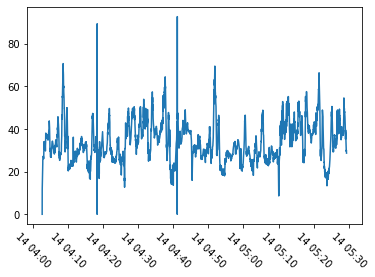

In [29]:
plt.plot(rr_2016['speed'])
plt.xticks(rotation=-45)

In [30]:
np.quantile(rr_2016['speed'],0.995)

65.03091065926571

In [31]:
np.quantile(rr_2016['speed'],0.005)

15.125572592408782

In [32]:
rr_2016[(rr_2016['speed'] > np.quantile(rr_2016['speed'],0.995)) | (rr_2016['speed'] < np.quantile(rr_2016['speed'],0.005))]

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN,0.000000
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0,0.003271
2016-05-14 04:08:37+00:00,-33.393300,151.222002,208.4,28.0,0.0,0.0,164.0,0.018537,-1.4,66.732206,1.0,3.356503
2016-05-14 04:08:39+00:00,-33.392981,151.222071,205.6,28.0,0.0,0.0,164.0,0.018297,-1.4,65.870223,1.0,3.392579
2016-05-14 04:08:40+00:00,-33.392805,151.222089,204.0,28.0,0.0,0.0,164.0,0.019642,-1.6,70.709487,1.0,3.412221
2016-05-14 04:08:41+00:00,-33.392640,151.222111,202.4,28.0,0.0,0.0,166.0,0.018460,-1.6,66.457793,1.0,3.430681
2016-05-14 04:08:42+00:00,-33.392474,151.222135,201.0,28.0,0.0,0.0,166.0,0.018592,-1.4,66.932466,1.0,3.449274
2016-05-14 04:08:43+00:00,-33.392311,151.222161,199.6,28.0,0.0,0.0,166.0,0.018285,-1.4,65.825278,1.0,3.467558
2016-05-14 04:08:44+00:00,-33.392151,151.222200,198.2,28.0,0.0,0.0,170.0,0.018156,-1.4,65.361174,1.0,3.485714
2016-05-14 04:18:20+00:00,-33.350502,151.229872,248.0,27.0,0.0,76.0,150.0,0.000000,0.0,0.000000,2.0,8.350205


In [33]:
len(rr_2016[(rr_2016['speed'] > np.quantile(rr_2016['speed'],0.995)) | (rr_2016['speed'] < np.quantile(rr_2016['speed'],0.005))])

30

In [34]:
rr_2016_outliers_out = rr_2016[(rr_2016['speed'] < np.quantile(rr_2016['speed'],0.995)) & (rr_2016['speed'] > np.quantile(rr_2016['speed'],0.005))]

In [35]:
rr_2016_outliers_out

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,0.021466
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,0.039169
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,0.052170
2016-05-14 04:02:52+00:00,-33.415104,151.221976,208.6,29.0,0.0,62.0,109.0,0.007111,0.0,25.599979,1.0,0.059281
2016-05-14 04:02:56+00:00,-33.414883,151.221809,208.6,29.0,0.0,70.0,112.0,0.029054,0.0,26.148643,4.0,0.088335
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:16+00:00,-33.416432,151.222722,198.4,24.0,0.0,0.0,172.0,0.008624,0.0,31.045284,1.0,49.007824
2016-05-14 05:29:17+00:00,-33.416497,151.222764,198.4,24.0,0.0,0.0,168.0,0.008212,0.0,29.562739,1.0,49.016036
2016-05-14 05:29:18+00:00,-33.416563,151.222807,198.4,24.0,0.0,0.0,164.0,0.008354,0.0,30.073849,1.0,49.024390
2016-05-14 05:29:19+00:00,-33.416627,151.222852,198.4,24.0,0.0,0.0,161.0,0.008252,0.0,29.705591,1.0,49.032642


In [36]:
len(rr_2016_outliers_out)

2792

In [37]:
len(rr_2016) - len(rr_2016_outliers_out)

30

In [38]:
rr_2016_outliers_out['speed'].max()

64.88087535027898

In [39]:
rr_2016_outliers_out['speed'].min()

15.1835646540262

(array([16935.16666667, 16935.17361111, 16935.18055556, 16935.1875    ,
        16935.19444444, 16935.20138889, 16935.20833333, 16935.21527778,
        16935.22222222, 16935.22916667]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

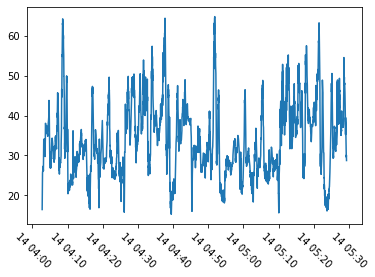

In [40]:
plt.plot(rr_2016_outliers_out['speed'])
plt.xticks(rotation=-45)

(array([16984.96180556, 16984.96527778, 16984.96875   , 16984.97222222,
        16984.97569444, 16984.97916667, 16984.98263889, 16984.98611111,
        16984.98958333, 16984.99305556]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

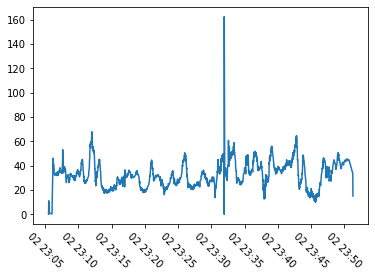

In [41]:
plt.plot(tt_2016['speed'])
plt.xticks(rotation=-45)

In [42]:
np.quantile(tt_2016['speed'],0.995)

62.235683281603436

In [43]:
np.quantile(tt_2016['speed'],0.005)

11.42273915429026

In [44]:
tt_2016[(tt_2016['speed'] > np.quantile(tt_2016['speed'],0.995)) | (tt_2016['speed'] < np.quantile(tt_2016['speed'],0.005))]

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN,0.000000
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0,0.006161
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0,0.007813
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0,0.009408
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0,0.011003
2016-07-02 23:11:59+00:00,-33.393081,151.221870,103.2,11.0,0.0,0.0,230.0,0.017459,-1.6,62.851672,1.0,3.438041
2016-07-02 23:12:00+00:00,-33.392912,151.221886,101.6,11.0,0.0,0.0,228.0,0.018851,-1.6,67.862011,1.0,3.456892
2016-07-02 23:12:01+00:00,-33.392748,151.221901,100.2,11.0,0.0,0.0,228.0,0.018289,-1.4,65.840624,1.0,3.475181
2016-07-02 23:12:02+00:00,-33.392582,151.221929,99.0,11.0,0.0,0.0,223.0,0.018641,-1.2,67.105804,1.0,3.493821
2016-07-02 23:31:55+00:00,-33.323696,151.232612,186.8,10.0,0.0,86.0,178.0,0.000000,0.0,0.000000,3.0,13.070739


In [45]:
len(tt_2016[(tt_2016['speed'] > np.quantile(tt_2016['speed'],0.995)) | (tt_2016['speed'] < np.quantile(tt_2016['speed'],0.005))])

16

In [46]:
tt_2016_outliers_out = tt_2016[(tt_2016['speed'] < np.quantile(tt_2016['speed'],0.995)) & (tt_2016['speed'] > np.quantile(tt_2016['speed'],0.005))]

In [47]:
tt_2016_outliers_out

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-07-02 23:06:04+00:00,-33.415976,151.222048,111.8,13.0,0.0,88.0,104.0,0.008019,0.0,14.435052,2.0,0.019022
2016-07-02 23:06:06+00:00,-33.415853,151.222023,111.8,13.0,0.0,97.0,107.0,0.013872,0.0,24.970333,2.0,0.032895
2016-07-02 23:06:08+00:00,-33.415700,151.221974,111.8,13.0,0.0,87.0,110.0,0.017610,0.0,31.698375,2.0,0.050505
2016-07-02 23:06:11+00:00,-33.415359,151.222040,111.8,13.0,0.0,86.0,113.0,0.038409,0.0,46.090924,3.0,0.088914
2016-07-02 23:06:14+00:00,-33.415096,151.221993,111.8,13.0,0.0,91.0,125.0,0.029568,0.0,35.481397,3.0,0.118482
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:50:39+00:00,-33.415476,151.221628,116.0,11.0,0.0,100.0,163.0,0.024989,0.0,44.980624,2.0,24.437593
2016-07-02 23:50:41+00:00,-33.415667,151.221757,115.4,11.0,0.0,99.0,163.0,0.024381,-0.6,43.885165,2.0,24.461973
2016-07-02 23:50:45+00:00,-33.416048,151.222013,115.4,11.0,0.0,0.0,162.0,0.048573,0.0,43.716017,4.0,24.510547
2016-07-02 23:51:16+00:00,-33.418333,151.223478,108.0,11.0,0.0,64.0,143.0,0.288175,-7.4,33.465472,31.0,24.798722


In [48]:
len(tt_2016_outliers_out)

1525

In [49]:
len(tt_2016) - len(tt_2016_outliers_out)

16

In [50]:
tt_2016_outliers_out['speed'].max()

62.13055122131724

In [51]:
tt_2016_outliers_out['speed'].min()

11.56571266333049

(array([16984.96180556, 16984.96527778, 16984.96875   , 16984.97222222,
        16984.97569444, 16984.97916667, 16984.98263889, 16984.98611111,
        16984.98958333, 16984.99305556]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

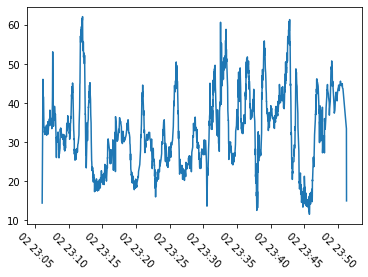

In [52]:
plt.plot(tt_2016_outliers_out['speed'])
plt.xticks(rotation=-45)

(array([18069.9375    , 18069.94444444, 18069.95138889, 18069.95833333,
        18069.96527778, 18069.97222222, 18069.97916667, 18069.98611111,
        18069.99305556, 18070.        , 18070.00694444]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

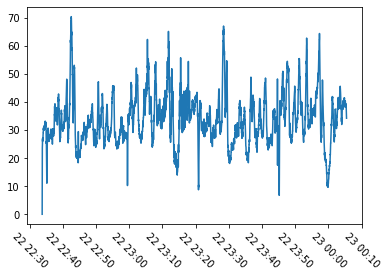

In [53]:
plt.plot(rr_2019['speed'])
plt.xticks(rotation=-45)

In [54]:
np.quantile(rr_2019['speed'],0.995)

64.42281194772899

In [55]:
np.quantile(rr_2019['speed'],0.005)

10.965150093895078

In [56]:
rr_2019[(rr_2019['speed'] > np.quantile(rr_2019['speed'],0.995)) | (rr_2019['speed'] < np.quantile(rr_2019['speed'],0.005))]

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN,0.000000
2019-06-22 22:42:23+00:00,-33.394063,151.221422,214.6,5.0,0.0,0.0,113.0,0.018496,-1.6,66.587188,1.0,4.692923
2019-06-22 22:42:24+00:00,-33.393916,151.221521,213.2,5.0,0.0,0.0,112.0,0.018752,-1.4,67.508674,1.0,4.711675
2019-06-22 22:42:25+00:00,-33.393766,151.221605,211.6,5.0,0.0,0.0,112.0,0.018412,-1.6,66.284122,1.0,4.730087
2019-06-22 22:42:26+00:00,-33.393608,151.221679,210.0,5.0,0.0,0.0,112.0,0.018864,-1.6,67.911243,1.0,4.748952
2019-06-22 22:42:27+00:00,-33.393445,151.221740,208.6,5.0,0.0,0.0,112.0,0.018989,-1.4,68.360023,1.0,4.767940
2019-06-22 22:42:28+00:00,-33.393279,151.221788,207.0,5.0,0.0,0.0,112.0,0.018989,-1.6,68.359145,1.0,4.786929
2019-06-22 22:42:29+00:00,-33.393110,151.221826,205.4,5.0,0.0,0.0,112.0,0.019120,-1.6,68.832793,1.0,4.806049
2019-06-22 22:42:30+00:00,-33.392942,151.221856,203.4,5.0,0.0,0.0,112.0,0.018887,-2.0,67.994021,1.0,4.824937
2019-06-22 22:42:31+00:00,-33.392768,151.221886,201.4,5.0,0.0,0.0,112.0,0.019547,-2.0,70.370469,1.0,4.844484


In [57]:
len(rr_2019[(rr_2019['speed'] > np.quantile(rr_2019['speed'],0.995)) | (rr_2019['speed'] < np.quantile(rr_2019['speed'],0.005))])

56

In [58]:
rr_2019_outliers_out = rr_2019[(rr_2019['speed'] < np.quantile(rr_2019['speed'],0.995)) & (rr_2019['speed'] > np.quantile(rr_2019['speed'],0.005))]

In [59]:
rr_2019_outliers_out

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0,0.004679
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0,0.010615
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0,0.017214
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0,0.023944
2019-06-22 22:33:50+00:00,-33.416837,151.223008,214.6,6.0,183.0,63.0,71.0,0.006872,-0.2,24.737627,1.0,0.030815
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 00:05:23+00:00,-33.415728,151.222289,216.6,7.0,28.0,23.0,153.0,0.010218,-0.2,36.786246,1.0,51.750079
2019-06-23 00:05:24+00:00,-33.415808,151.222340,216.6,7.0,13.0,10.0,153.0,0.010077,0.0,36.275739,1.0,51.760155
2019-06-23 00:05:25+00:00,-33.415885,151.222391,216.6,7.0,0.0,0.0,152.0,0.009783,0.0,35.220093,1.0,51.769939
2019-06-23 00:05:26+00:00,-33.415962,151.222440,216.6,7.0,0.0,0.0,152.0,0.009695,0.0,34.901660,1.0,51.779633


In [60]:
len(rr_2019_outliers_out)

5447

In [61]:
len(rr_2019) - len(rr_2019_outliers_out)

56

In [62]:
rr_2019_outliers_out['speed'].max()

64.36235740176431

In [63]:
rr_2019_outliers_out['speed'].min()

10.969040981070053

(array([18069.9375    , 18069.94444444, 18069.95138889, 18069.95833333,
        18069.96527778, 18069.97222222, 18069.97916667, 18069.98611111,
        18069.99305556, 18070.        , 18070.00694444]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

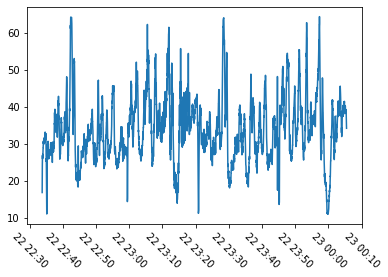

In [64]:
plt.plot(rr_2019_outliers_out['speed'])
plt.xticks(rotation=-45)

(array([18048.95486111, 18048.95833333, 18048.96180556, 18048.96527778,
        18048.96875   , 18048.97222222, 18048.97569444, 18048.97916667,
        18048.98263889, 18048.98611111]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

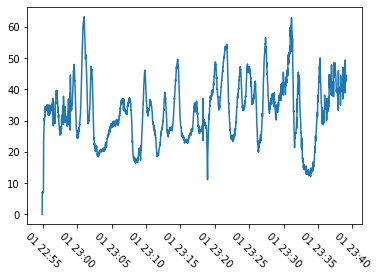

In [65]:
plt.plot(tt_2019['speed'])
plt.xticks(rotation=-45)

In [66]:
np.quantile(tt_2019['speed'],0.995)

60.40774449244295

In [67]:
np.quantile(tt_2019['speed'],0.005)

11.65072325885178

In [68]:
tt_2019[(tt_2019['speed'] > np.quantile(tt_2019['speed'],0.995)) | (tt_2019['speed'] < np.quantile(tt_2019['speed'],0.005))]

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN,0.000000
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0,0.001965
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0,0.003874
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0,0.005840
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0,0.007846
2019-06-01 22:55:00+00:00,-33.415719,151.222013,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075657,1.0,0.009812
2019-06-01 22:55:01+00:00,-33.415704,151.222003,219.4,13.0,0.0,0.0,90.0,0.001909,0.0,6.871583,1.0,0.011721
2019-06-01 22:55:02+00:00,-33.415688,151.221994,219.2,13.0,0.0,0.0,91.0,0.001965,-0.2,7.075657,1.0,0.013686
2019-06-01 22:55:03+00:00,-33.415672,151.221984,219.2,13.0,0.0,0.0,92.0,0.002007,0.0,7.223998,1.0,0.015693
2019-06-01 22:55:04+00:00,-33.415656,151.221975,219.4,13.0,0.0,5.0,93.0,0.001965,0.2,7.075658,1.0,0.017658


In [69]:
len(tt_2019[(tt_2019['speed'] > np.quantile(tt_2019['speed'],0.995)) | (tt_2019['speed'] < np.quantile(tt_2019['speed'],0.005))])

28

In [70]:
tt_2019_outliers_out = tt_2019[(tt_2019['speed'] < np.quantile(tt_2019['speed'],0.995)) & (tt_2019['speed'] > np.quantile(tt_2019['speed'],0.005))]

In [71]:
tt_2019_outliers_out

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2019-06-01 22:55:07+00:00,-33.415575,151.221929,219.4,13.0,500.0,67.0,97.0,0.006098,0.0,21.954313,1.0,0.027631
2019-06-01 22:55:08+00:00,-33.415522,151.221900,219.4,13.0,493.0,74.0,99.0,0.006479,0.0,23.324036,1.0,0.034110
2019-06-01 22:55:09+00:00,-33.415464,151.221867,219.4,13.0,477.0,80.0,101.0,0.007140,0.0,25.702772,1.0,0.041249
2019-06-01 22:55:10+00:00,-33.415404,151.221833,219.6,13.0,431.0,86.0,103.0,0.007380,0.2,26.569339,1.0,0.048630
2019-06-01 22:55:11+00:00,-33.415341,151.221795,219.6,13.0,428.0,89.0,105.0,0.007843,0.0,28.234953,1.0,0.056473
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 23:39:05+00:00,-33.415270,151.221994,220.8,10.0,335.0,101.0,166.0,0.012323,-0.2,44.363507,1.0,24.331623
2019-06-01 23:39:06+00:00,-33.415367,151.222056,220.8,10.0,350.0,101.0,166.0,0.012225,0.0,44.009916,1.0,24.343848
2019-06-01 23:39:07+00:00,-33.415462,151.222122,220.6,10.0,273.0,101.0,166.0,0.012211,-0.2,43.960218,1.0,24.356059
2019-06-01 23:39:08+00:00,-33.415555,151.222189,220.4,10.0,210.0,99.0,166.0,0.012067,-0.2,43.440736,1.0,24.368126


In [72]:
len(tt_2019_outliers_out)

2627

In [73]:
len(tt_2019) - len(tt_2019_outliers_out)

28

In [74]:
tt_2019_outliers_out['speed'].max()

60.20741591627811

In [75]:
tt_2019_outliers_out['speed'].min()

12.074133643858412

(array([18048.95486111, 18048.95833333, 18048.96180556, 18048.96527778,
        18048.96875   , 18048.97222222, 18048.97569444, 18048.97916667,
        18048.98263889, 18048.98611111]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

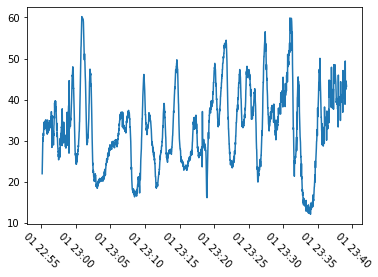

In [76]:
plt.plot(tt_2019_outliers_out['speed'])
plt.xticks(rotation=-45)

Now that the outliers have been removed, the average speeds and range of speeds will be recalculated. 

In [77]:
print('The average speed for rr_2016 with outliers removed is ' + str(rr_2016_outliers_out['speed'].sum()/len(rr_2016_outliers_out)) + ' km/h')
print('The average speed for tt_2016 with outliers removed is ' + str(tt_2016_outliers_out['speed'].sum()/len(tt_2016_outliers_out)) + ' km/h')
print('The average speed for rr_2019 with outliers removed is ' + str(rr_2019_outliers_out['speed'].sum()/len(rr_2019_outliers_out)) + ' km/h')
print('The average speed for tt_2019 with outliers removed is ' + str(tt_2019_outliers_out['speed'].sum()/len(tt_2019_outliers_out)) + ' km/h')

The average speed for rr_2016 with outliers removed is 34.87377661675947 km/h
The average speed for tt_2016 with outliers removed is 33.45177469738119 km/h
The average speed for rr_2019 with outliers removed is 33.83619015563063 km/h
The average speed for tt_2019 with outliers removed is 33.04332195405935 km/h


As we can see, time trials are not necessarily faster than road races. In fact, looking at the average speeds, they are very similar.

Comparing with original datasets:

In [78]:
print('The average speed for rr_2016 is ' + str(rr_2016['speed'].sum()/len(rr_2016)) + ' km/h')
print('The average speed for tt_2016 is ' + str(tt_2016['speed'].sum()/len(tt_2016)) + ' km/h')
print('The average speed for rr_2019 is ' + str(rr_2019['speed'].sum()/len(rr_2019)) + ' km/h')
print('The average speed for tt_2019 is ' + str(tt_2019['speed'].sum()/len(tt_2019)) + ' km/h')

The average speed for rr_2016 is 34.93308475482937 km/h
The average speed for tt_2016 is 33.52996304869017 km/h
The average speed for rr_2019 is 33.87986137188045 km/h
The average speed for tt_2019 is 33.057823788156945 km/h


The average speeds have slightly decreased, due to the removal of outliers which were mainly extremely fast speeds - too fast to be reasonably realistic given the context (non-professional rider).

Now describing the datasets with outliers out:

In [79]:
rr_2016_outliers_out.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
count,2792.000000,2792.000000,2792.000000,2792.000000,2792.0,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000
mean,-33.367844,151.225550,232.600430,25.273281,0.0,66.319126,158.364971,0.017444,0.001361,34.873777,1.850645,24.479211
std,0.028307,0.006021,29.665477,1.343600,0.0,34.256826,11.197761,0.015744,0.450468,10.306396,1.699023,14.090017
min,-33.416753,151.211496,176.000000,24.000000,0.0,0.000000,103.000000,0.004218,-1.400000,15.183565,1.000000,0.021466
25%,-33.393701,151.221931,210.000000,24.000000,0.0,68.000000,151.000000,0.007959,-0.400000,26.703955,1.000000,12.078524
50%,-33.370770,151.227271,226.200000,25.000000,0.0,79.000000,158.000000,0.011794,0.000000,33.307339,1.000000,24.628339
75%,-33.342156,151.230074,258.200000,26.000000,0.0,87.000000,166.000000,0.016784,0.400000,42.849779,2.000000,36.619235
max,-33.316890,151.235131,295.800000,30.000000,0.0,117.000000,205.000000,0.076283,1.200000,64.880875,9.000000,49.048586


In [80]:
tt_2016_outliers_out.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.0,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,-33.367871,151.225431,139.315148,10.949508,0.0,83.762623,170.968525,0.016141,0.002623,33.451775,1.771803,11.819501
std,0.027965,0.006184,30.224417,0.654638,0.0,20.452045,22.991133,0.015929,0.510358,10.686006,1.744242,6.873921
min,-33.418368,151.211206,85.000000,10.000000,0.0,0.000000,104.000000,0.003213,-7.400000,11.565713,1.000000,0.019022
25%,-33.393693,151.221857,116.600000,11.000000,0.0,77.000000,157.000000,0.007656,-0.400000,25.125322,1.000000,5.489313
50%,-33.369675,151.227377,134.000000,11.000000,0.0,86.000000,161.000000,0.010974,0.000000,32.840076,1.000000,11.525939
75%,-33.343107,151.230074,165.600000,11.000000,0.0,96.000000,180.000000,0.015849,0.400000,41.293893,2.000000,17.811353
max,-33.316888,151.235137,202.600000,13.000000,0.0,118.000000,251.000000,0.288175,2.400000,62.130551,31.000000,24.802887


In [81]:
rr_2019_outliers_out.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
count,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.0,5447.000000
mean,-33.371479,151.225254,243.458785,5.999449,214.920323,70.502295,139.056728,0.009399,0.006426,33.836190,1.0,25.561428
std,0.030594,0.006154,30.097313,0.801325,143.806065,29.482312,16.093714,0.002335,0.332844,8.404744,0.0,14.971446
min,-33.422174,151.211507,185.200000,0.000000,0.000000,0.000000,71.000000,0.003047,-2.000000,10.969041,1.0,0.004679
25%,-33.397093,151.221630,220.000000,5.000000,106.000000,67.000000,129.000000,0.007850,-0.200000,28.261552,1.0,12.332672
50%,-33.373429,151.227082,236.200000,6.000000,213.000000,81.000000,142.000000,0.009178,0.000000,33.041360,1.0,25.749075
75%,-33.344833,151.229985,269.800000,7.000000,309.000000,89.000000,152.000000,0.010706,0.200000,38.542646,1.0,38.167433
max,-33.316877,151.235094,310.200000,7.000000,785.000000,120.000000,170.000000,0.017878,1.000000,64.362357,1.0,51.789133


In [82]:
tt_2019_outliers_out.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
count,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.0,2627.000000
mean,-33.368091,151.225422,250.731252,10.179673,260.062048,90.908641,153.065474,0.009179,0.006852,33.043322,1.0,11.894403
std,0.028569,0.006253,29.332364,0.813817,76.004176,15.101158,7.073511,0.002614,0.285920,9.410282,0.0,6.961415
min,-33.415648,151.211507,195.800000,9.000000,0.000000,0.000000,97.000000,0.003354,-1.400000,12.074134,1.0,0.027631
25%,-33.394848,151.221334,229.800000,10.000000,215.000000,88.000000,150.000000,0.007379,-0.200000,26.563557,1.0,5.950482
50%,-33.369570,151.227417,244.000000,10.000000,265.000000,94.000000,153.000000,0.009228,0.000000,33.220108,1.0,11.361616
75%,-33.343541,151.230045,276.300000,10.000000,308.500000,98.000000,158.000000,0.010898,0.200000,39.231202,1.0,18.021772
max,-33.316896,151.235098,312.200000,13.000000,500.000000,111.000000,166.000000,0.016724,0.600000,60.207416,1.0,24.380145


Once again, comparing with original datasets:

In [83]:
rr_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2821.000000,2822.000000
mean,-33.368017,151.225527,232.404465,25.280652,0.0,65.987952,158.394401,0.017381,-0.003756,34.933085,1.843318,24.413090
std,0.028329,0.006014,29.725934,1.348746,0.0,34.425881,11.304588,0.015695,0.458872,10.738677,1.692364,14.093957
min,-33.416753,151.211496,176.000000,24.000000,0.0,0.000000,102.000000,0.000000,-1.600000,0.000000,1.000000,0.000000
25%,-33.393691,151.221912,209.450000,24.000000,0.0,68.000000,151.000000,0.007894,-0.400000,26.656312,1.000000,12.026354
50%,-33.371820,151.227236,226.100000,25.000000,0.0,79.000000,158.000000,0.011794,0.000000,33.307339,1.000000,24.471536
75%,-33.342269,151.230069,258.200000,26.000000,0.0,87.000000,166.000000,0.016899,0.400000,42.871885,2.000000,36.590391
max,-33.316890,151.235131,295.800000,30.000000,0.0,117.000000,205.000000,0.076283,1.200000,92.749036,9.000000,49.048586


In [84]:
tt_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
count,1541.000000,1541.000000,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1540.000000,1541.000000
mean,-33.368105,151.225411,139.068657,10.953277,0.0,83.277093,170.939650,0.016095,-0.002466,33.529963,1.783766,11.789742
std,0.028055,0.006166,30.301132,0.657937,0.0,21.169978,23.392548,0.015897,0.515343,11.519681,1.822713,6.902810
min,-33.418368,151.211206,85.000000,10.000000,0.0,0.000000,100.000000,0.000000,-7.400000,0.000000,1.000000,0.000000
25%,-33.393795,151.221870,116.200000,11.000000,0.0,77.000000,157.000000,0.007622,-0.400000,25.068271,1.000000,5.453215
50%,-33.370613,151.227333,134.000000,11.000000,0.0,86.000000,161.000000,0.010974,0.000000,32.840076,1.000000,11.478978
75%,-33.343332,151.230072,165.400000,11.000000,0.0,96.000000,180.000000,0.015960,0.400000,41.470522,2.000000,17.822598
max,-33.316888,151.235137,202.600000,13.000000,0.0,118.000000,251.000000,0.288175,2.400000,162.505764,31.000000,24.802887


In [85]:
rr_2019.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
count,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5502.0,5503.000000
mean,-33.371644,151.225232,243.243576,5.997819,213.617845,70.004906,138.998546,0.009411,0.000254,33.879861,1.0,25.579328
std,0.030592,0.006142,30.197981,0.806414,144.123686,29.869938,16.184123,0.002459,0.347322,8.853503,0.0,15.006623
min,-33.422174,151.211507,185.200000,0.000000,0.000000,0.000000,71.000000,0.000000,-2.000000,0.000000,1.0,0.000000
25%,-33.396939,151.221591,219.600000,5.000000,104.000000,66.000000,129.000000,0.007839,-0.200000,28.219962,1.0,12.305513
50%,-33.373835,151.227064,236.000000,6.000000,212.000000,81.000000,142.000000,0.009178,0.000000,33.041360,1.0,25.819329
75%,-33.344994,151.229977,269.600000,7.000000,308.000000,89.000000,152.000000,0.010733,0.200000,38.640026,1.0,38.217682
max,-33.316865,151.235094,310.400000,7.000000,785.000000,120.000000,170.000000,0.019547,1.000000,70.370469,1.0,51.789133


In [86]:
tt_2019.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
count,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2654.0,2655.000000
mean,-33.368391,151.225397,250.435104,10.194350,257.566855,89.979661,152.741243,0.009183,0.000377,33.057824,1.0,11.814772
std,0.028682,0.006234,29.434104,0.833934,80.023555,17.543883,8.217632,0.002715,0.298628,9.773522,0.0,6.997105
min,-33.415798,151.211507,195.800000,9.000000,0.000000,0.000000,88.000000,0.000000,-1.600000,0.000000,1.0,0.000000
25%,-33.394910,151.221400,229.200000,10.000000,213.500000,88.000000,150.000000,0.007345,-0.200000,26.440757,1.0,5.812418
50%,-33.370118,151.227363,243.800000,10.000000,264.000000,94.000000,153.000000,0.009228,0.000000,33.220108,1.0,11.276385
75%,-33.343803,151.230040,276.200000,10.000000,308.000000,98.000000,158.000000,0.010913,0.200000,39.286242,1.0,17.981419
max,-33.316882,151.235098,312.200000,13.000000,522.000000,111.000000,166.000000,0.017584,0.600000,63.300734,1.0,24.380145


Apart from the expected results of the minimum increasing and the maximum decreasing, the standard deviation has also slightly decreased. 

Now the minimum and maximum speeds for original and no-outliers datasets will be compared.

In [87]:
print('The maximum speed for rr_2016 is ' + str(rr_2016['speed'].max()) + ' km/h')

print('The minimum speed for rr_2016 is ' + str(rr_2016['speed'].min()) + ' km/h')

print('The maximum speed for rr_2016 with outliers removed is ' + str(rr_2016_outliers_out['speed'].max()) + ' km/h')

print('The minimum speed for rr_2016 with outliers removed is ' + str(rr_2016_outliers_out['speed'].min()) + ' km/h')

The maximum speed for rr_2016 is 92.74903649913952 km/h
The minimum speed for rr_2016 is 0.0 km/h
The maximum speed for rr_2016 with outliers removed is 64.88087535027898 km/h
The minimum speed for rr_2016 with outliers removed is 15.1835646540262 km/h


In [88]:
print('The maximum speed for tt_2016 is ' + str(tt_2016['speed'].max()) + ' km/h')

print('The minimum speed for tt_2016 is ' + str(tt_2016['speed'].min()) + ' km/h')

print('The maximum speed for tt_2016 with outliers removed is ' + str(tt_2016_outliers_out['speed'].max()) + ' km/h')

print('The minimum speed for tt_2016 with outliers removed is ' + str(tt_2016_outliers_out['speed'].min()) + ' km/h')

The maximum speed for tt_2016 is 162.50576377606754 km/h
The minimum speed for tt_2016 is 0.0 km/h
The maximum speed for tt_2016 with outliers removed is 62.13055122131724 km/h
The minimum speed for tt_2016 with outliers removed is 11.56571266333049 km/h


In [89]:
print('The maximum speed for rr_2019 is ' + str(rr_2019['speed'].max()) + ' km/h')

print('The minimum speed for rr_2019 is ' + str(rr_2019['speed'].min()) + ' km/h')

print('The maximum speed for rr_2019 with outliers removed is ' + str(rr_2019_outliers_out['speed'].max()) + ' km/h')

print('The minimum speed for rr_2019 with outliers removed is ' + str(rr_2019_outliers_out['speed'].min()) + ' km/h')

The maximum speed for rr_2019 is 70.37046868335639 km/h
The minimum speed for rr_2019 is 0.0 km/h
The maximum speed for rr_2019 with outliers removed is 64.36235740176431 km/h
The minimum speed for rr_2019 with outliers removed is 10.969040981070053 km/h


In [90]:
print('The maximum speed for tt_2019 is ' + str(tt_2019['speed'].max()) + ' km/h')

print('The minimum speed for tt_2019 is ' + str(tt_2019['speed'].min()) + ' km/h')

print('The maximum speed for tt_2019 with outliers removed is ' + str(tt_2019_outliers_out['speed'].max()) + ' km/h')

print('The minimum speed for tt_2019 with outliers removed is ' + str(tt_2019_outliers_out['speed'].min()) + ' km/h')

The maximum speed for tt_2019 is 63.300734121945005 km/h
The minimum speed for tt_2019 is 0.0 km/h
The maximum speed for tt_2019 with outliers removed is 60.20741591627811 km/h
The minimum speed for tt_2019 with outliers removed is 12.074133643858412 km/h


The 2016 races appear to have more significant (more extreme) maximum speed outliers than the 2019 ones. 

In [91]:
print('The range of speeds for rr_2016 with outliers removed is ' + str(rr_2016_outliers_out['speed'].max() - rr_2016_outliers_out['speed'].min()) + ' km/h')

The range of speeds for rr_2016 with outliers removed is 49.697310696252785 km/h


In [92]:
print('The range of speeds for tt_2016 with outliers removed is ' + str(tt_2016_outliers_out['speed'].max() - tt_2016_outliers_out['speed'].min()) + ' km/h')

The range of speeds for tt_2016 with outliers removed is 50.56483855798675 km/h


In [93]:
print('The range of speeds for rr_2019 with outliers removed is ' + str(rr_2019_outliers_out['speed'].max() - rr_2019_outliers_out['speed'].min()) + ' km/h')

The range of speeds for rr_2019 with outliers removed is 53.39331642069426 km/h


In [94]:
print('The range of speeds for tt_2019 with outliers removed is ' + str(tt_2019_outliers_out['speed'].max() - tt_2019_outliers_out['speed'].min()) + ' km/h')

The range of speeds for tt_2019 with outliers removed is 48.1332822724197 km/h


Now the two time trials will be compared, beginning with their average speeds.

In [95]:
print('The average speed for tt_2016 is ' + str(tt_2016['speed'].sum()/len(tt_2016)) + ' km/h')

print('The average speed for tt_2019 is ' + str(tt_2019['speed'].sum()/len(tt_2019)) + ' km/h')

The average speed for tt_2016 is 33.52996304869017 km/h
The average speed for tt_2019 is 33.057823788156945 km/h


The average speeds are very similar. Next we will see where in the ride one or the other is faster. The overall distance needs to be used as the x-axis, because the default x-axis - the time - differs by a whole three years and thus is unsuitable.

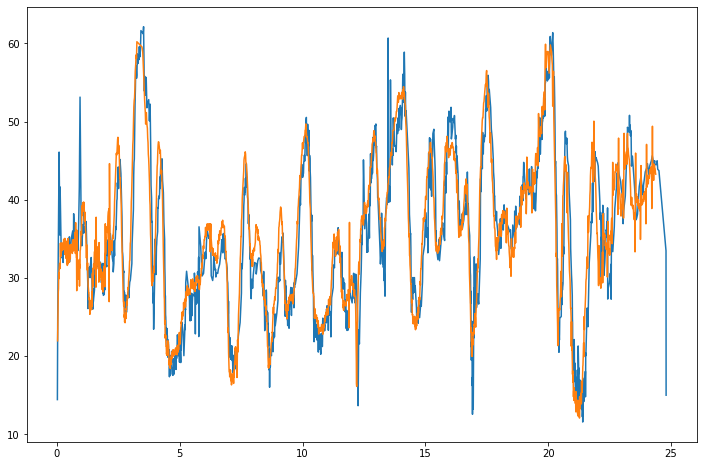

In [96]:
plt.figure(figsize=(12,8))
plt.plot(tt_2016_outliers_out['overall_distance'],tt_2016_outliers_out['speed'])
plt.plot(tt_2019_outliers_out['overall_distance'],tt_2019_outliers_out['speed'])

Now the average speeds in the three possible cases of elevation_gain (climbing – greater than 0, descending – less than 0, and on the flat – 0) will be calculated. 

In [97]:
rr_2016_outliers_out[(rr_2016_outliers_out['elevation_gain'] > 0)]

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-05-14 04:03:12+00:00,-33.413920,151.221172,209.0,29.0,0.0,89.0,129.0,0.016318,0.4,29.373214,2.0,0.210725
2016-05-14 04:03:13+00:00,-33.413845,151.221124,209.4,29.0,0.0,90.0,130.0,0.009455,0.4,34.038144,1.0,0.220180
2016-05-14 04:03:14+00:00,-33.413777,151.221082,209.8,29.0,0.0,90.0,131.0,0.008507,0.4,30.625217,1.0,0.228687
2016-05-14 04:03:15+00:00,-33.413708,151.221037,210.4,29.0,0.0,90.0,131.0,0.008736,0.6,31.448331,1.0,0.237423
2016-05-14 04:03:16+00:00,-33.413634,151.220988,210.8,29.0,0.0,91.0,133.0,0.009402,0.4,33.845981,1.0,0.246824
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:27:46+00:00,-33.408885,151.216852,201.0,24.0,0.0,81.0,178.0,0.011222,0.4,40.398752,1.0,48.001313
2016-05-14 05:27:47+00:00,-33.408966,151.216905,201.6,24.0,0.0,81.0,177.0,0.010263,0.6,36.945897,1.0,48.011576
2016-05-14 05:27:48+00:00,-33.409046,151.216959,202.0,24.0,0.0,81.0,177.0,0.010211,0.4,36.757958,1.0,48.021787
2016-05-14 05:27:49+00:00,-33.409123,151.217012,202.4,24.0,0.0,81.0,177.0,0.009875,0.4,35.548917,1.0,48.031661


In [98]:
rr_2016_outliers_out_climbing = rr_2016_outliers_out[(rr_2016_outliers_out['elevation_gain'] > 0)]
rr_2016_outliers_out_climbing

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-05-14 04:03:12+00:00,-33.413920,151.221172,209.0,29.0,0.0,89.0,129.0,0.016318,0.4,29.373214,2.0,0.210725
2016-05-14 04:03:13+00:00,-33.413845,151.221124,209.4,29.0,0.0,90.0,130.0,0.009455,0.4,34.038144,1.0,0.220180
2016-05-14 04:03:14+00:00,-33.413777,151.221082,209.8,29.0,0.0,90.0,131.0,0.008507,0.4,30.625217,1.0,0.228687
2016-05-14 04:03:15+00:00,-33.413708,151.221037,210.4,29.0,0.0,90.0,131.0,0.008736,0.6,31.448331,1.0,0.237423
2016-05-14 04:03:16+00:00,-33.413634,151.220988,210.8,29.0,0.0,91.0,133.0,0.009402,0.4,33.845981,1.0,0.246824
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:27:46+00:00,-33.408885,151.216852,201.0,24.0,0.0,81.0,178.0,0.011222,0.4,40.398752,1.0,48.001313
2016-05-14 05:27:47+00:00,-33.408966,151.216905,201.6,24.0,0.0,81.0,177.0,0.010263,0.6,36.945897,1.0,48.011576
2016-05-14 05:27:48+00:00,-33.409046,151.216959,202.0,24.0,0.0,81.0,177.0,0.010211,0.4,36.757958,1.0,48.021787
2016-05-14 05:27:49+00:00,-33.409123,151.217012,202.4,24.0,0.0,81.0,177.0,0.009875,0.4,35.548917,1.0,48.031661


In [99]:
rr_2016_outliers_out[(rr_2016_outliers_out['elevation_gain'] < 0)]

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-05-14 04:06:33+00:00,-33.399506,151.211599,225.6,29.0,0.0,89.0,158.0,0.028937,-0.4,34.724037,3.0,2.077827
2016-05-14 04:06:34+00:00,-33.399423,151.211624,225.2,29.0,0.0,89.0,158.0,0.009517,-0.4,34.259403,1.0,2.087344
2016-05-14 04:06:35+00:00,-33.399341,151.211653,224.8,29.0,0.0,89.0,158.0,0.009507,-0.4,34.225590,1.0,2.096851
2016-05-14 04:06:36+00:00,-33.399261,151.211682,224.4,29.0,0.0,88.0,158.0,0.009294,-0.4,33.458526,1.0,2.106145
2016-05-14 04:06:37+00:00,-33.399178,151.211714,224.0,29.0,0.0,87.0,158.0,0.009695,-0.4,34.903720,1.0,2.115840
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:02+00:00,-33.415365,151.222037,199.8,24.0,0.0,0.0,181.0,0.010698,-0.4,38.513626,1.0,48.873186
2016-05-14 05:29:03+00:00,-33.415450,151.222090,199.2,24.0,0.0,0.0,181.0,0.010655,-0.6,38.358217,1.0,48.883842
2016-05-14 05:29:04+00:00,-33.415528,151.222139,198.8,24.0,0.0,0.0,187.0,0.009793,-0.4,35.255723,1.0,48.893635
2016-05-14 05:29:05+00:00,-33.415613,151.222199,198.4,24.0,0.0,0.0,187.0,0.010970,-0.4,39.492553,1.0,48.904605


In [100]:
rr_2016_outliers_out_descending = rr_2016_outliers_out[(rr_2016_outliers_out['elevation_gain'] < 0)]
rr_2016_outliers_out_descending 

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-05-14 04:06:33+00:00,-33.399506,151.211599,225.6,29.0,0.0,89.0,158.0,0.028937,-0.4,34.724037,3.0,2.077827
2016-05-14 04:06:34+00:00,-33.399423,151.211624,225.2,29.0,0.0,89.0,158.0,0.009517,-0.4,34.259403,1.0,2.087344
2016-05-14 04:06:35+00:00,-33.399341,151.211653,224.8,29.0,0.0,89.0,158.0,0.009507,-0.4,34.225590,1.0,2.096851
2016-05-14 04:06:36+00:00,-33.399261,151.211682,224.4,29.0,0.0,88.0,158.0,0.009294,-0.4,33.458526,1.0,2.106145
2016-05-14 04:06:37+00:00,-33.399178,151.211714,224.0,29.0,0.0,87.0,158.0,0.009695,-0.4,34.903720,1.0,2.115840
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:02+00:00,-33.415365,151.222037,199.8,24.0,0.0,0.0,181.0,0.010698,-0.4,38.513626,1.0,48.873186
2016-05-14 05:29:03+00:00,-33.415450,151.222090,199.2,24.0,0.0,0.0,181.0,0.010655,-0.6,38.358217,1.0,48.883842
2016-05-14 05:29:04+00:00,-33.415528,151.222139,198.8,24.0,0.0,0.0,187.0,0.009793,-0.4,35.255723,1.0,48.893635
2016-05-14 05:29:05+00:00,-33.415613,151.222199,198.4,24.0,0.0,0.0,187.0,0.010970,-0.4,39.492553,1.0,48.904605


In [101]:
rr_2016_outliers_out[(rr_2016_outliers_out['elevation_gain'] == 0)]

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,0.021466
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,0.039169
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,0.052170
2016-05-14 04:02:52+00:00,-33.415104,151.221976,208.6,29.0,0.0,62.0,109.0,0.007111,0.0,25.599979,1.0,0.059281
2016-05-14 04:02:56+00:00,-33.414883,151.221809,208.6,29.0,0.0,70.0,112.0,0.029054,0.0,26.148643,4.0,0.088335
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:15+00:00,-33.416362,151.222682,198.4,24.0,0.0,0.0,179.0,0.036232,0.0,32.609021,4.0,48.999201
2016-05-14 05:29:16+00:00,-33.416432,151.222722,198.4,24.0,0.0,0.0,172.0,0.008624,0.0,31.045284,1.0,49.007824
2016-05-14 05:29:17+00:00,-33.416497,151.222764,198.4,24.0,0.0,0.0,168.0,0.008212,0.0,29.562739,1.0,49.016036
2016-05-14 05:29:18+00:00,-33.416563,151.222807,198.4,24.0,0.0,0.0,164.0,0.008354,0.0,30.073849,1.0,49.024390


In [102]:
rr_2016_outliers_out_flat = rr_2016_outliers_out[(rr_2016_outliers_out['elevation_gain'] == 0)]
rr_2016_outliers_out_flat

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,0.021466
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,0.039169
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,0.052170
2016-05-14 04:02:52+00:00,-33.415104,151.221976,208.6,29.0,0.0,62.0,109.0,0.007111,0.0,25.599979,1.0,0.059281
2016-05-14 04:02:56+00:00,-33.414883,151.221809,208.6,29.0,0.0,70.0,112.0,0.029054,0.0,26.148643,4.0,0.088335
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:15+00:00,-33.416362,151.222682,198.4,24.0,0.0,0.0,179.0,0.036232,0.0,32.609021,4.0,48.999201
2016-05-14 05:29:16+00:00,-33.416432,151.222722,198.4,24.0,0.0,0.0,172.0,0.008624,0.0,31.045284,1.0,49.007824
2016-05-14 05:29:17+00:00,-33.416497,151.222764,198.4,24.0,0.0,0.0,168.0,0.008212,0.0,29.562739,1.0,49.016036
2016-05-14 05:29:18+00:00,-33.416563,151.222807,198.4,24.0,0.0,0.0,164.0,0.008354,0.0,30.073849,1.0,49.024390


We can see that each category has a reasonably sufficient number of observations to enable the average speeds calculated to be meaningful.

In [103]:
print('The average speed for rr_2016 with outliers removed and category climbing, where elevation gain is greater than 0, is ' + str(rr_2016_outliers_out_climbing['speed'].sum() /len(rr_2016_outliers_out_climbing)) + ' km/h')

The average speed for rr_2016 with outliers removed and category climbing, where elevation gain is greater than 0, is 26.441128598092178 km/h


In [104]:
print('The average speed for rr_2016 with outliers removed and category descending, where elevation gain is less than 0, is ' + str(rr_2016_outliers_out_descending['speed'].sum() /len(rr_2016_outliers_out_descending)) + ' km/h')

The average speed for rr_2016 with outliers removed and category descending, where elevation gain is less than 0, is 45.6334534511895 km/h


In [105]:
print('The average speed for rr_2016 with outliers removed and category flat, where elevation gain is equal to 0, is ' + str(rr_2016_outliers_out_flat['speed'].sum() /len(rr_2016_outliers_out_flat)) + ' km/h')

The average speed for rr_2016 with outliers removed and category flat, where elevation gain is equal to 0, is 34.53558619036981 km/h


In [106]:
tt_2016_outliers_out_climbing = tt_2016_outliers_out[(tt_2016_outliers_out['elevation_gain'] > 0)]
tt_2016_outliers_out_climbing

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-07-02 23:06:48+00:00,-33.412495,151.220537,112.6,13.0,0.0,97.0,173.0,0.009495,0.8,34.182414,1.0,0.440004
2016-07-02 23:06:52+00:00,-33.412211,151.220313,113.2,13.0,0.0,98.0,186.0,0.009587,0.6,34.512509,1.0,0.477826
2016-07-02 23:06:53+00:00,-33.412138,151.220262,113.6,13.0,0.0,98.0,193.0,0.009397,0.4,33.828015,1.0,0.487222
2016-07-02 23:06:54+00:00,-33.412066,151.220207,114.0,13.0,0.0,97.0,200.0,0.009495,0.4,34.182463,1.0,0.496717
2016-07-02 23:07:29+00:00,-33.409753,151.217790,114.4,13.0,0.0,89.0,213.0,0.058192,0.4,34.915328,6.0,0.838569
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:48:01+00:00,-33.401264,151.211338,127.0,11.0,0.0,88.0,158.0,0.010015,0.4,36.055360,1.0,22.576425
2016-07-02 23:49:30+00:00,-33.409343,151.216622,114.6,11.0,0.0,85.0,155.0,0.020939,0.6,37.689956,2.0,23.607862
2016-07-02 23:49:44+00:00,-33.410454,151.217725,115.6,11.0,0.0,95.0,155.0,0.059439,1.0,42.796247,5.0,23.768585
2016-07-02 23:49:53+00:00,-33.411131,151.218476,116.0,11.0,0.0,94.0,156.0,0.011273,0.4,40.582157,1.0,23.871221


In [107]:
tt_2016_outliers_out_descending = tt_2016_outliers_out[(tt_2016_outliers_out['elevation_gain'] < 0)]
tt_2016_outliers_out_descending 

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-07-02 23:07:57+00:00,-33.407552,151.216002,115.6,12.0,0.0,104.0,232.0,0.030833,-0.4,36.999543,3.0,1.137076
2016-07-02 23:08:02+00:00,-33.407158,151.215713,115.2,12.0,0.0,100.0,232.0,0.020674,-0.4,37.212841,2.0,1.188469
2016-07-02 23:08:06+00:00,-33.406905,151.215463,114.8,12.0,0.0,93.0,232.0,0.036468,-0.4,32.821483,4.0,1.224937
2016-07-02 23:08:11+00:00,-33.406627,151.215196,114.4,12.0,0.0,86.0,225.0,0.007243,-0.4,26.076127,1.0,1.264562
2016-07-02 23:09:24+00:00,-33.401750,151.211960,126.0,12.0,0.0,83.0,216.0,0.008261,-0.2,29.741019,1.0,1.888652
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:49:10+00:00,-33.407493,151.215559,115.4,11.0,0.0,100.0,157.0,0.013371,-1.2,48.135930,1.0,23.379503
2016-07-02 23:49:11+00:00,-33.407588,151.215627,114.0,11.0,0.0,99.0,157.0,0.012306,-1.4,44.300282,1.0,23.391809
2016-07-02 23:50:32+00:00,-33.414787,151.221189,116.0,11.0,0.0,99.0,162.0,0.012354,-0.6,44.474300,1.0,24.350797
2016-07-02 23:50:41+00:00,-33.415667,151.221757,115.4,11.0,0.0,99.0,163.0,0.024381,-0.6,43.885165,2.0,24.461973


In [108]:
tt_2016_outliers_out_flat = tt_2016_outliers_out[(tt_2016_outliers_out['elevation_gain'] == 0)]
tt_2016_outliers_out_flat

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-07-02 23:06:04+00:00,-33.415976,151.222048,111.8,13.0,0.0,88.0,104.0,0.008019,0.0,14.435052,2.0,0.019022
2016-07-02 23:06:06+00:00,-33.415853,151.222023,111.8,13.0,0.0,97.0,107.0,0.013872,0.0,24.970333,2.0,0.032895
2016-07-02 23:06:08+00:00,-33.415700,151.221974,111.8,13.0,0.0,87.0,110.0,0.017610,0.0,31.698375,2.0,0.050505
2016-07-02 23:06:11+00:00,-33.415359,151.222040,111.8,13.0,0.0,86.0,113.0,0.038409,0.0,46.090924,3.0,0.088914
2016-07-02 23:06:14+00:00,-33.415096,151.221993,111.8,13.0,0.0,91.0,125.0,0.029568,0.0,35.481397,3.0,0.118482
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:50:31+00:00,-33.414691,151.221122,116.6,11.0,0.0,99.0,162.0,0.037490,0.0,44.988492,3.0,24.338443
2016-07-02 23:50:37+00:00,-33.415274,151.221510,116.0,11.0,0.0,100.0,162.0,0.061807,0.0,44.500933,5.0,24.412603
2016-07-02 23:50:39+00:00,-33.415476,151.221628,116.0,11.0,0.0,100.0,163.0,0.024989,0.0,44.980624,2.0,24.437593
2016-07-02 23:50:45+00:00,-33.416048,151.222013,115.4,11.0,0.0,0.0,162.0,0.048573,0.0,43.716017,4.0,24.510547


In [109]:
len(tt_2016_outliers_out)

1525

In [110]:
len(tt_2016_outliers_out_climbing) + len(tt_2016_outliers_out_descending) + len(tt_2016_outliers_out_flat)

1525

In [111]:
print('The average speed for tt_2016 with outliers removed and category climbing, where elevation gain is greater than 0, is ' + str(tt_2016_outliers_out_climbing['speed'].sum() /len(tt_2016_outliers_out_climbing)) + ' km/h')

The average speed for tt_2016 with outliers removed and category climbing, where elevation gain is greater than 0, is 24.62858152782046 km/h


In [112]:
print('The average speed for tt_2016 with outliers removed and category descending, where elevation gain is less than 0, is ' + str(tt_2016_outliers_out_descending['speed'].sum() /len(tt_2016_outliers_out_descending)) + ' km/h')

The average speed for tt_2016 with outliers removed and category descending, where elevation gain is less than 0, is 44.57347899636252 km/h


In [113]:
print('The average speed for tt_2016 with outliers removed and category flat, where elevation gain is equal to 0, is ' + str(tt_2016_outliers_out_flat['speed'].sum() /len(tt_2016_outliers_out_flat)) + ' km/h')

The average speed for tt_2016 with outliers removed and category flat, where elevation gain is equal to 0, is 34.382629708621344 km/h


In [114]:
rr_2019_outliers_out_climbing = rr_2019_outliers_out[(rr_2019_outliers_out['elevation_gain'] > 0)]
rr_2019_outliers_out_climbing

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2019-06-22 22:35:15+00:00,-33.421949,151.224906,203.2,6.0,476.0,57.0,118.0,0.006419,0.2,23.107532,1.0,0.691212
2019-06-22 22:35:20+00:00,-33.421617,151.224780,203.4,6.0,230.0,76.0,118.0,0.008218,0.2,29.586197,1.0,0.729990
2019-06-22 22:35:21+00:00,-33.421544,151.224761,203.6,6.0,278.0,75.0,118.0,0.008307,0.2,29.903589,1.0,0.738297
2019-06-22 22:35:22+00:00,-33.421472,151.224743,203.8,6.0,297.0,75.0,118.0,0.008178,0.2,29.442476,1.0,0.746475
2019-06-22 22:35:23+00:00,-33.421401,151.224724,204.0,6.0,313.0,75.0,118.0,0.008089,0.2,29.121731,1.0,0.754564
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 00:04:31+00:00,-33.411298,151.219245,220.8,7.0,276.0,93.0,152.0,0.010659,0.2,38.373041,1.0,51.181299
2019-06-23 00:04:32+00:00,-33.411372,151.219316,221.0,7.0,267.0,94.0,152.0,0.010542,0.2,37.951716,1.0,51.191841
2019-06-23 00:04:33+00:00,-33.411446,151.219389,221.2,7.0,254.0,94.0,152.0,0.010659,0.2,38.373015,1.0,51.202501
2019-06-23 00:04:34+00:00,-33.411523,151.219461,221.4,7.0,244.0,94.0,152.0,0.010861,0.2,39.100982,1.0,51.213362


In [115]:
rr_2019_outliers_out_descending = rr_2019_outliers_out[(rr_2019_outliers_out['elevation_gain'] < 0)]
rr_2019_outliers_out_descending 

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0,0.010615
2019-06-22 22:33:50+00:00,-33.416837,151.223008,214.6,6.0,183.0,63.0,71.0,0.006872,-0.2,24.737627,1.0,0.030815
2019-06-22 22:33:52+00:00,-33.416953,151.223085,214.4,6.0,89.0,67.0,71.0,0.007493,-0.2,26.974159,1.0,0.045561
2019-06-22 22:33:53+00:00,-33.417010,151.223122,214.2,6.0,78.0,68.0,71.0,0.007209,-0.2,25.951103,1.0,0.052770
2019-06-22 22:33:54+00:00,-33.417069,151.223158,214.0,6.0,75.0,68.0,71.0,0.007362,-0.2,26.504449,1.0,0.060132
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 00:05:19+00:00,-33.415396,151.222075,217.2,7.0,280.0,95.0,153.0,0.010797,-0.2,38.867730,1.0,51.708157
2019-06-23 00:05:20+00:00,-33.415481,151.222131,217.0,7.0,267.0,89.0,153.0,0.010786,-0.2,38.831175,1.0,51.718944
2019-06-23 00:05:22+00:00,-33.415647,151.222237,216.8,7.0,44.0,36.0,153.0,0.010317,-0.2,37.139572,1.0,51.739860
2019-06-23 00:05:23+00:00,-33.415728,151.222289,216.6,7.0,28.0,23.0,153.0,0.010218,-0.2,36.786246,1.0,51.750079


In [116]:
rr_2019_outliers_out_flat = rr_2019_outliers_out[(rr_2019_outliers_out['elevation_gain'] == 0)]
rr_2019_outliers_out_flat

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0,0.004679
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0,0.017214
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0,0.023944
2019-06-22 22:33:51+00:00,-33.416894,151.223046,214.6,6.0,147.0,67.0,71.0,0.007253,0.0,26.111935,1.0,0.038069
2019-06-22 22:33:57+00:00,-33.417246,151.223271,213.6,6.0,113.0,68.0,71.0,0.007547,0.0,27.167566,1.0,0.082435
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 00:05:18+00:00,-33.415310,151.222021,217.4,7.0,285.0,95.0,153.0,0.010840,0.0,39.023971,1.0,51.697361
2019-06-23 00:05:21+00:00,-33.415565,151.222185,217.0,7.0,104.0,55.0,153.0,0.010600,0.0,38.160412,1.0,51.729544
2019-06-23 00:05:24+00:00,-33.415808,151.222340,216.6,7.0,13.0,10.0,153.0,0.010077,0.0,36.275739,1.0,51.760155
2019-06-23 00:05:25+00:00,-33.415885,151.222391,216.6,7.0,0.0,0.0,152.0,0.009783,0.0,35.220093,1.0,51.769939


In [117]:
len(rr_2019_outliers_out)

5447

In [118]:
len(rr_2019_outliers_out_climbing) + len(rr_2019_outliers_out_descending) + len(rr_2019_outliers_out_flat)

5447

In [119]:
print('The average speed for rr_2019 with outliers removed and category climbing, where elevation gain is greater than 0, is ' + str(rr_2019_outliers_out_climbing['speed'].sum() /len(rr_2019_outliers_out_climbing)) + ' km/h')

The average speed for rr_2019 with outliers removed and category climbing, where elevation gain is greater than 0, is 28.98327745652126 km/h


In [120]:
print('The average speed for rr_2019 with outliers removed and category descending, where elevation gain is less than 0, is ' + str(rr_2019_outliers_out_descending['speed'].sum() /len(rr_2019_outliers_out_descending)) + ' km/h')

The average speed for rr_2019 with outliers removed and category descending, where elevation gain is less than 0, is 40.85282362460455 km/h


In [121]:
print('The average speed for rr_2019 with outliers removed and category flat, where elevation gain is equal to 0, is ' + str(rr_2019_outliers_out_flat['speed'].sum() /len(rr_2019_outliers_out_flat)) + ' km/h')

The average speed for rr_2019 with outliers removed and category flat, where elevation gain is equal to 0, is 33.47650690695904 km/h


In [122]:
tt_2019_outliers_out_climbing = tt_2019_outliers_out[(tt_2019_outliers_out['elevation_gain'] > 0)]
tt_2019_outliers_out_climbing

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2019-06-01 22:55:10+00:00,-33.415404,151.221833,219.6,13.0,431.0,86.0,103.0,0.007380,0.2,26.569339,1.0,0.048630
2019-06-01 22:55:14+00:00,-33.415139,151.221683,219.8,13.0,354.0,97.0,112.0,0.008305,0.2,29.896457,1.0,0.081227
2019-06-01 22:55:17+00:00,-33.414927,151.221559,220.0,13.0,357.0,89.0,118.0,0.008846,0.2,31.846652,1.0,0.107462
2019-06-01 22:55:19+00:00,-33.414786,151.221476,220.2,13.0,353.0,92.0,121.0,0.008664,0.2,31.190695,1.0,0.124930
2019-06-01 22:55:21+00:00,-33.414638,151.221388,220.4,13.0,284.0,93.0,122.0,0.009567,0.2,34.442917,1.0,0.143303
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 23:37:50+00:00,-33.408915,151.216896,225.0,10.0,354.0,99.0,160.0,0.010670,0.2,38.413225,1.0,23.475725
2019-06-01 23:37:51+00:00,-33.409000,151.216945,225.2,10.0,331.0,98.0,160.0,0.010489,0.2,37.760321,1.0,23.486214
2019-06-01 23:38:15+00:00,-33.410812,151.218738,223.4,10.0,301.0,102.0,161.0,0.010952,0.2,39.425640,1.0,23.748743
2019-06-01 23:38:17+00:00,-33.410947,151.218885,223.6,10.0,306.0,103.0,160.0,0.010587,0.2,38.114303,1.0,23.769029


In [123]:
tt_2019_outliers_out_descending = tt_2019_outliers_out[(tt_2019_outliers_out['elevation_gain'] < 0)]
tt_2019_outliers_out_descending 

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2019-06-01 22:56:07+00:00,-33.411311,151.219072,223.2,13.0,282.0,97.0,141.0,0.009239,-0.2,33.259888,1.0,0.572291
2019-06-01 22:56:47+00:00,-33.408751,151.216655,225.6,12.0,157.0,92.0,147.0,0.008685,-0.2,31.266816,1.0,0.936745
2019-06-01 22:56:49+00:00,-33.408598,151.216573,225.4,12.0,209.0,97.0,146.0,0.009332,-0.2,33.596578,1.0,0.955384
2019-06-01 22:56:50+00:00,-33.408520,151.216533,225.2,12.0,189.0,100.0,146.0,0.009435,-0.2,33.964214,1.0,0.964819
2019-06-01 22:56:52+00:00,-33.408358,151.216448,224.8,12.0,221.0,92.0,146.0,0.009991,-0.4,35.967228,1.0,0.984485
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 23:39:01+00:00,-33.414880,151.221753,221.2,10.0,320.0,101.0,166.0,0.012280,-0.2,44.208508,1.0,24.282826
2019-06-01 23:39:03+00:00,-33.415073,151.221873,221.0,10.0,305.0,100.0,166.0,0.012379,-0.2,44.564088,1.0,24.307004
2019-06-01 23:39:05+00:00,-33.415270,151.221994,220.8,10.0,335.0,101.0,166.0,0.012323,-0.2,44.363507,1.0,24.331623
2019-06-01 23:39:07+00:00,-33.415462,151.222122,220.6,10.0,273.0,101.0,166.0,0.012211,-0.2,43.960218,1.0,24.356059


In [124]:
tt_2019_outliers_out_flat = tt_2019_outliers_out[(tt_2019_outliers_out['elevation_gain'] == 0)]
tt_2019_outliers_out_flat

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2019-06-01 22:55:07+00:00,-33.415575,151.221929,219.4,13.0,500.0,67.0,97.0,0.006098,0.0,21.954313,1.0,0.027631
2019-06-01 22:55:08+00:00,-33.415522,151.221900,219.4,13.0,493.0,74.0,99.0,0.006479,0.0,23.324036,1.0,0.034110
2019-06-01 22:55:09+00:00,-33.415464,151.221867,219.4,13.0,477.0,80.0,101.0,0.007140,0.0,25.702772,1.0,0.041249
2019-06-01 22:55:11+00:00,-33.415341,151.221795,219.6,13.0,428.0,89.0,105.0,0.007843,0.0,28.234953,1.0,0.056473
2019-06-01 22:55:12+00:00,-33.415277,151.221757,219.6,13.0,438.0,93.0,108.0,0.007943,0.0,28.593067,1.0,0.064415
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 23:38:59+00:00,-33.414684,151.221632,221.6,10.0,327.0,101.0,166.0,0.012280,0.0,44.208529,1.0,24.258308
2019-06-01 23:39:02+00:00,-33.414974,151.221812,221.2,10.0,315.0,100.0,166.0,0.011800,0.0,42.479771,1.0,24.294625
2019-06-01 23:39:04+00:00,-33.415172,151.221932,221.0,10.0,324.0,101.0,166.0,0.012295,0.0,44.262424,1.0,24.319300
2019-06-01 23:39:06+00:00,-33.415367,151.222056,220.8,10.0,350.0,101.0,166.0,0.012225,0.0,44.009916,1.0,24.343848


In [125]:
len(tt_2019_outliers_out)

2627

In [126]:
len(tt_2019_outliers_out_climbing) + len(tt_2019_outliers_out_descending) + len(tt_2019_outliers_out_flat)

2627

In [127]:
print('The average speed for tt_2019 with outliers removed and category climbing, where elevation gain is greater than 0, is ' + str(tt_2019_outliers_out_climbing['speed'].sum() /len(tt_2019_outliers_out_climbing)) + ' km/h')

The average speed for tt_2019 with outliers removed and category climbing, where elevation gain is greater than 0, is 26.056113929501237 km/h


In [128]:
print('The average speed for tt_2019 with outliers removed and category descending, where elevation gain is less than 0, is ' + str(tt_2019_outliers_out_descending['speed'].sum() /len(tt_2019_outliers_out_descending)) + ' km/h')

The average speed for tt_2019 with outliers removed and category descending, where elevation gain is less than 0, is 42.369704885340454 km/h


In [129]:
print('The average speed for tt_2019 with outliers removed and category flat, where elevation gain is equal to 0, is ' + str(tt_2019_outliers_out_flat['speed'].sum() /len(tt_2019_outliers_out_flat)) + ' km/h')

The average speed for tt_2019 with outliers removed and category flat, where elevation gain is equal to 0, is 33.693450018243254 km/h


Now the average speeds per case will be compared. 

In [130]:
rr_2016_outliers_out_climbing_avg = rr_2016_outliers_out_climbing['speed'].sum() /len(rr_2016_outliers_out_climbing)

rr_2016_outliers_out_climbing_avg

26.441128598092178

In [131]:
print('The average speed for rr_2016 with outliers removed and category climbing, where elevation gain is greater than 0, is ' + str(rr_2016_outliers_out_climbing_avg) + ' km/h')

The average speed for rr_2016 with outliers removed and category climbing, where elevation gain is greater than 0, is 26.441128598092178 km/h


In [132]:
tt_2016_outliers_out_climbing_avg = tt_2016_outliers_out_climbing['speed'].sum() /len(tt_2016_outliers_out_climbing)

tt_2016_outliers_out_climbing_avg

24.62858152782046

In [133]:
rr_2019_outliers_out_climbing_avg = rr_2019_outliers_out_climbing['speed'].sum() /len(rr_2019_outliers_out_climbing)

rr_2019_outliers_out_climbing_avg

28.98327745652126

In [134]:
tt_2019_outliers_out_climbing_avg = tt_2019_outliers_out_climbing['speed'].sum() /len(tt_2019_outliers_out_climbing)

tt_2019_outliers_out_climbing_avg

26.056113929501237

In [135]:
print('The overall average speed with outliers removed and category climbing, where elevation gain is greater than 0, is ' + str((rr_2016_outliers_out_climbing_avg + tt_2016_outliers_out_climbing_avg + rr_2019_outliers_out_climbing_avg + tt_2019_outliers_out_climbing_avg) / 4) + ' km/h')

The overall average speed with outliers removed and category climbing, where elevation gain is greater than 0, is 26.527275377983784 km/h


In [136]:
rr_2016_outliers_out_descending_avg = rr_2016_outliers_out_descending['speed'].sum() /len(rr_2016_outliers_out_descending)

rr_2016_outliers_out_descending_avg

45.6334534511895

In [137]:
tt_2016_outliers_out_descending_avg = tt_2016_outliers_out_descending['speed'].sum() /len(tt_2016_outliers_out_descending)

tt_2016_outliers_out_descending_avg

44.57347899636252

In [138]:
rr_2019_outliers_out_descending_avg = rr_2019_outliers_out_descending['speed'].sum() /len(rr_2019_outliers_out_descending)

rr_2019_outliers_out_descending_avg

40.85282362460455

In [139]:
tt_2019_outliers_out_descending_avg = tt_2019_outliers_out_descending['speed'].sum() /len(tt_2019_outliers_out_descending)

tt_2019_outliers_out_descending_avg

42.369704885340454

In [140]:
print('The overall average speed with outliers removed and category descending, where elevation gain is less than 0, is ' + str((rr_2016_outliers_out_descending_avg + tt_2016_outliers_out_descending_avg + rr_2019_outliers_out_descending_avg + tt_2019_outliers_out_descending_avg) / 4) + ' km/h')

The overall average speed with outliers removed and category descending, where elevation gain is less than 0, is 43.35736523937426 km/h


In [141]:
rr_2016_outliers_out_flat_avg = rr_2016_outliers_out_flat['speed'].sum() /len(rr_2016_outliers_out_flat)

rr_2016_outliers_out_flat_avg

34.53558619036981

In [142]:
tt_2016_outliers_out_flat_avg = tt_2016_outliers_out_flat['speed'].sum() /len(tt_2016_outliers_out_flat)

tt_2016_outliers_out_flat_avg

34.382629708621344

In [143]:
rr_2019_outliers_out_flat_avg = rr_2019_outliers_out_flat['speed'].sum() /len(rr_2019_outliers_out_flat)

rr_2019_outliers_out_flat_avg

33.47650690695904

In [144]:
tt_2019_outliers_out_flat_avg = tt_2019_outliers_out_flat['speed'].sum() /len(tt_2019_outliers_out_flat)

tt_2019_outliers_out_flat_avg

33.693450018243254

In [145]:
print('The overall average speed with outliers removed and category flat, where elevation gain is equal to 0, is ' + str((rr_2016_outliers_out_flat_avg + tt_2016_outliers_out_flat_avg + rr_2019_outliers_out_flat_avg + tt_2019_outliers_out_flat_avg) / 4) + ' km/h')

The overall average speed with outliers removed and category flat, where elevation gain is equal to 0, is 34.02204320604836 km/h


In [146]:
overall_avg_outliers_out_climbing = (rr_2016_outliers_out_climbing_avg + tt_2016_outliers_out_climbing_avg + rr_2019_outliers_out_climbing_avg + tt_2019_outliers_out_climbing_avg) / 4

overall_avg_outliers_out_climbing

26.527275377983784

In [147]:
overall_avg_outliers_out_descending = (rr_2016_outliers_out_descending_avg + tt_2016_outliers_out_descending_avg + rr_2019_outliers_out_descending_avg + tt_2019_outliers_out_descending_avg) / 4

overall_avg_outliers_out_descending

43.35736523937426

In [148]:
overall_avg_outliers_out_flat = (rr_2016_outliers_out_flat_avg + tt_2016_outliers_out_flat_avg + rr_2019_outliers_out_flat_avg + tt_2019_outliers_out_flat_avg) / 4

overall_avg_outliers_out_flat

34.02204320604836

In [149]:
rr_2016_avgspeed_outliers_out = rr_2016_outliers_out['speed'].sum()/len(rr_2016_outliers_out) 

rr_2016_avgspeed_outliers_out

34.87377661675947

In [150]:
tt_2016_avgspeed_outliers_out = tt_2016_outliers_out['speed'].sum()/len(tt_2016_outliers_out) 

rr_2019_avgspeed_outliers_out = rr_2019_outliers_out['speed'].sum()/len(rr_2019_outliers_out) 

tt_2019_avgspeed_outliers_out = tt_2019_outliers_out['speed'].sum()/len(tt_2019_outliers_out) 

In [151]:
overall_avgspeed_outliers_out = (rr_2016_avgspeed_outliers_out + tt_2016_avgspeed_outliers_out + rr_2019_avgspeed_outliers_out + tt_2019_avgspeed_outliers_out) / 4

overall_avgspeed_outliers_out

print('The overall average speed with outliers removed is ' + str(overall_avgspeed_outliers_out) + ' km/h')

The overall average speed with outliers removed is 33.80126585595766 km/h


In [152]:
overall_avgspeed_outliers_out

33.80126585595766

In [153]:
print('The difference between the overall average speed with outliers removed and the overall average speed while climbing with outliers removed is ' + str(overall_avgspeed_outliers_out - overall_avg_outliers_out_climbing) + ' km/h')

The difference between the overall average speed with outliers removed and the overall average speed while climbing with outliers removed is 7.273990477973875 km/h


In [154]:
print('The difference between the overall average speed with outliers removed and the overall average speed while descending with outliers removed is ' + str(overall_avg_outliers_out_descending - overall_avgspeed_outliers_out) + ' km/h')

The difference between the overall average speed with outliers removed and the overall average speed while descending with outliers removed is 9.556099383416601 km/h


With outliers removed, the overall average while flat is closest to the overall average. As expected, the overall average while climbing is less than the overall average, with a difference of about 7km/h, and the overall average while descending is about 10km/h more than the overall average. 

Looking at the differences with rr_2016:

In [155]:
print('The difference between the rr_2016 average speed with outliers removed and the rr_2016 average speed while climbing with outliers removed is ' + str(rr_2016_avgspeed_outliers_out - rr_2016_outliers_out_climbing_avg) + ' km/h')

The difference between the rr_2016 average speed with outliers removed and the rr_2016 average speed while climbing with outliers removed is 8.432648018667294 km/h


In [156]:
print('The difference between the rr_2016 average speed with outliers removed and the rr_2016 average speed while descending with outliers removed is ' + str(rr_2016_outliers_out_descending_avg - rr_2016_avgspeed_outliers_out) + ' km/h')

The difference between the rr_2016 average speed with outliers removed and the rr_2016 average speed while descending with outliers removed is 10.759676834430032 km/h


In [157]:
print('The difference between the rr_2016 average speed with outliers removed and the rr_2016 average speed while flat with outliers removed is ' + str(rr_2016_outliers_out_flat_avg - rr_2016_avgspeed_outliers_out) + ' km/h')

The difference between the rr_2016 average speed with outliers removed and the rr_2016 average speed while flat with outliers removed is -0.3381904263896587 km/h


Looking at the differences with tt_2016:

In [158]:
print('The difference between the tt_2016 average speed with outliers removed and the tt_2016 average speed while climbing with outliers removed is ' + str(tt_2016_avgspeed_outliers_out - tt_2016_outliers_out_climbing_avg) + ' km/h')

The difference between the tt_2016 average speed with outliers removed and the tt_2016 average speed while climbing with outliers removed is 8.823193169560728 km/h


In [159]:
print('The difference between the tt_2016 average speed with outliers removed and the tt_2016 average speed while descending with outliers removed is ' + str(tt_2016_outliers_out_descending_avg - tt_2016_avgspeed_outliers_out) + ' km/h')

The difference between the tt_2016 average speed with outliers removed and the tt_2016 average speed while descending with outliers removed is 11.121704298981328 km/h


In [160]:
print('The difference between the tt_2016 average speed with outliers removed and the tt_2016 average speed while flat with outliers removed is ' + str(tt_2016_outliers_out_flat_avg - tt_2016_avgspeed_outliers_out) + ' km/h')

The difference between the tt_2016 average speed with outliers removed and the tt_2016 average speed while flat with outliers removed is 0.9308550112401548 km/h


Looking at the differences with rr_2019:

In [161]:
print('The difference between the rr_2019 average speed with outliers removed and the rr_2019 average speed while climbing with outliers removed is ' + str(rr_2019_avgspeed_outliers_out - rr_2019_outliers_out_climbing_avg) + ' km/h')

The difference between the rr_2019 average speed with outliers removed and the rr_2019 average speed while climbing with outliers removed is 4.852912699109371 km/h


In [162]:
print('The difference between the rr_2019 average speed with outliers removed and the rr_2019 average speed while descending with outliers removed is ' + str(rr_2019_outliers_out_descending_avg - rr_2019_avgspeed_outliers_out) + ' km/h')

The difference between the rr_2019 average speed with outliers removed and the rr_2019 average speed while descending with outliers removed is 7.0166334689739145 km/h


In [163]:
print('The difference between the rr_2019 average speed with outliers removed and the rr_2019 average speed while flat with outliers removed is ' + str(rr_2019_outliers_out_flat_avg - rr_2019_avgspeed_outliers_out) + ' km/h')

The difference between the rr_2019 average speed with outliers removed and the rr_2019 average speed while flat with outliers removed is -0.35968324867159396 km/h


Looking at the differences with tt_2019:

In [164]:
print('The difference between the tt_2019 average speed with outliers removed and the tt_2019 average speed while climbing with outliers removed is ' + str(tt_2019_avgspeed_outliers_out - tt_2019_outliers_out_climbing_avg) + ' km/h')

The difference between the tt_2019 average speed with outliers removed and the tt_2019 average speed while climbing with outliers removed is 6.9872080245581145 km/h


In [165]:
print('The difference between the tt_2019 average speed with outliers removed and the tt_2019 average speed while descending with outliers removed is ' + str(tt_2019_outliers_out_descending_avg - tt_2019_avgspeed_outliers_out) + ' km/h')

The difference between the tt_2019 average speed with outliers removed and the tt_2019 average speed while descending with outliers removed is 9.326382931281103 km/h


In [166]:
print('The difference between the tt_2019 average speed with outliers removed and the tt_2019 average speed while flat with outliers removed is ' + str(tt_2019_outliers_out_flat_avg - tt_2019_avgspeed_outliers_out) + ' km/h')

The difference between the tt_2019 average speed with outliers removed and the tt_2019 average speed while flat with outliers removed is 0.6501280641839031 km/h


## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectively tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _metres_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





In [167]:
rr_2016_outliers_out

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,0.021466
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,0.039169
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,0.052170
2016-05-14 04:02:52+00:00,-33.415104,151.221976,208.6,29.0,0.0,62.0,109.0,0.007111,0.0,25.599979,1.0,0.059281
2016-05-14 04:02:56+00:00,-33.414883,151.221809,208.6,29.0,0.0,70.0,112.0,0.029054,0.0,26.148643,4.0,0.088335
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:16+00:00,-33.416432,151.222722,198.4,24.0,0.0,0.0,172.0,0.008624,0.0,31.045284,1.0,49.007824
2016-05-14 05:29:17+00:00,-33.416497,151.222764,198.4,24.0,0.0,0.0,168.0,0.008212,0.0,29.562739,1.0,49.016036
2016-05-14 05:29:18+00:00,-33.416563,151.222807,198.4,24.0,0.0,0.0,164.0,0.008354,0.0,30.073849,1.0,49.024390
2016-05-14 05:29:19+00:00,-33.416627,151.222852,198.4,24.0,0.0,0.0,161.0,0.008252,0.0,29.705591,1.0,49.032642


In [168]:
rr_2016_outliers_out['speed m/min'] = rr_2016_outliers_out['speed']*100/6

rr_2016_outliers_out['development'] = rr_2016_outliers_out['speed m/min'] / rr_2016_outliers_out['cadence']

rr_2016_outliers_out

<ipython-input-168-ff1b59eecf7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr_2016_outliers_out['speed m/min'] = rr_2016_outliers_out['speed']*100/6
<ipython-input-168-ff1b59eecf7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr_2016_outliers_out['development'] = rr_2016_outliers_out['speed m/min'] / rr_2016_outliers_out['cadence']


,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance,speed m/min,development
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,0.021466,272.917224,6.822931
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,0.039169,354.065009,6.437546
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,0.052170,390.020291,6.393775
2016-05-14 04:02:52+00:00,-33.415104,151.221976,208.6,29.0,0.0,62.0,109.0,0.007111,0.0,25.599979,1.0,0.059281,426.666325,6.881715
2016-05-14 04:02:56+00:00,-33.414883,151.221809,208.6,29.0,0.0,70.0,112.0,0.029054,0.0,26.148643,4.0,0.088335,435.810719,6.225867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:16+00:00,-33.416432,151.222722,198.4,24.0,0.0,0.0,172.0,0.008624,0.0,31.045284,1.0,49.007824,517.421399,inf
2016-05-14 05:29:17+00:00,-33.416497,151.222764,198.4,24.0,0.0,0.0,168.0,0.008212,0.0,29.562739,1.0,49.016036,492.712322,inf
2016-05-14 05:29:18+00:00,-33.416563,151.222807,198.4,24.0,0.0,0.0,164.0,0.008354,0.0,30.073849,1.0,49.024390,501.230816,inf
2016-05-14 05:29:19+00:00,-33.416627,151.222852,198.4,24.0,0.0,0.0,161.0,0.008252,0.0,29.705591,1.0,49.032642,495.093176,inf


In [169]:
rr_2016_outliers_out_1 = rr_2016_outliers_out.drop( rr_2016_outliers_out.index[((rr_2016_outliers_out['development'] > 10) | (rr_2016_outliers_out['development'] < 2))])

In [170]:
rr_2016_outliers_out_1

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance,speed m/min,development
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,0.021466,272.917224,6.822931
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,0.039169,354.065009,6.437546
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,0.052170,390.020291,6.393775
2016-05-14 04:02:52+00:00,-33.415104,151.221976,208.6,29.0,0.0,62.0,109.0,0.007111,0.0,25.599979,1.0,0.059281,426.666325,6.881715
2016-05-14 04:02:56+00:00,-33.414883,151.221809,208.6,29.0,0.0,70.0,112.0,0.029054,0.0,26.148643,4.0,0.088335,435.810719,6.225867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:28:40+00:00,-33.413164,151.220644,200.8,24.0,0.0,104.0,169.0,0.026567,0.0,47.820718,2.0,48.596369,797.011963,7.663577
2016-05-14 05:28:44+00:00,-33.413602,151.220923,200.8,24.0,0.0,103.0,180.0,0.055160,0.0,49.643892,4.0,48.651529,827.398196,8.032992
2016-05-14 05:28:45+00:00,-33.413709,151.220986,200.8,24.0,0.0,102.0,180.0,0.013257,0.0,47.725651,1.0,48.664786,795.427523,7.798309
2016-05-14 05:28:54+00:00,-33.414636,151.221582,200.8,24.0,0.0,92.0,185.0,0.063469,0.0,45.697454,5.0,48.781784,761.624225,8.278524


In [171]:
len(rr_2016_outliers_out)

2792

In [172]:
len(rr_2016_outliers_out_1)

2176

In [173]:
rr_2016_outliers_out['development'].max()

inf

In [174]:
rr_2016_outliers_out['development'].min()

3.474002117472871

In [175]:
rr_2016_outliers_out_1['development'].max()

9.976672320293204

In [176]:
rr_2016_outliers_out_1['development'].min()

3.474002117472871

Text(0.5, 1.0, 'Histogram of development distribution for rr_2016')

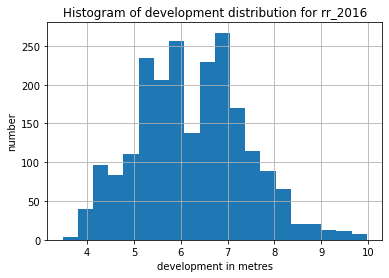

In [177]:
rr_2016_outliers_out_1['development'].hist(histtype = 'stepfilled', bins = 20)
plt.xlabel('development in metres')
plt.ylabel('number')
plt.title('Histogram of development distribution for rr_2016')

In [178]:
tt_2016_outliers_out['speed m/min'] = tt_2016_outliers_out['speed']*100/6

tt_2016_outliers_out['development'] = tt_2016_outliers_out['speed m/min'] / tt_2016_outliers_out['cadence']

tt_2016_outliers_out_1 = tt_2016_outliers_out.drop( tt_2016_outliers_out.index[((tt_2016_outliers_out['development'] > 10) | (tt_2016_outliers_out['development'] < 2))])

tt_2016_outliers_out_1

<ipython-input-178-369c6a0c58bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt_2016_outliers_out['speed m/min'] = tt_2016_outliers_out['speed']*100/6
<ipython-input-178-369c6a0c58bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt_2016_outliers_out['development'] = tt_2016_outliers_out['speed m/min'] / tt_2016_outliers_out['cadence']


,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance,speed m/min,development
2016-07-02 23:06:04+00:00,-33.415976,151.222048,111.8,13.0,0.0,88.0,104.0,0.008019,0.0,14.435052,2.0,0.019022,240.584198,2.733911
2016-07-02 23:06:06+00:00,-33.415853,151.222023,111.8,13.0,0.0,97.0,107.0,0.013872,0.0,24.970333,2.0,0.032895,416.172212,4.290435
2016-07-02 23:06:08+00:00,-33.415700,151.221974,111.8,13.0,0.0,87.0,110.0,0.017610,0.0,31.698375,2.0,0.050505,528.306248,6.072486
2016-07-02 23:06:11+00:00,-33.415359,151.222040,111.8,13.0,0.0,86.0,113.0,0.038409,0.0,46.090924,3.0,0.088914,768.182069,8.932350
2016-07-02 23:06:14+00:00,-33.415096,151.221993,111.8,13.0,0.0,91.0,125.0,0.029568,0.0,35.481397,3.0,0.118482,591.356612,6.498424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:50:37+00:00,-33.415274,151.221510,116.0,11.0,0.0,100.0,162.0,0.061807,0.0,44.500933,5.0,24.412603,741.682214,7.416822
2016-07-02 23:50:39+00:00,-33.415476,151.221628,116.0,11.0,0.0,100.0,163.0,0.024989,0.0,44.980624,2.0,24.437593,749.677070,7.496771
2016-07-02 23:50:41+00:00,-33.415667,151.221757,115.4,11.0,0.0,99.0,163.0,0.024381,-0.6,43.885165,2.0,24.461973,731.419424,7.388075
2016-07-02 23:51:16+00:00,-33.418333,151.223478,108.0,11.0,0.0,64.0,143.0,0.288175,-7.4,33.465472,31.0,24.798722,557.757862,8.714967


In [179]:
tt_2016_outliers_out['development'].max()

inf

In [180]:
tt_2016_outliers_out['development'].min()

2.733911344924089

In [181]:
tt_2016_outliers_out_1['development'].max()

9.707782929052891

In [182]:
tt_2016_outliers_out_1['development'].min()

2.733911344924089

Text(0.5, 1.0, 'Histogram of development distribution for tt_2016')

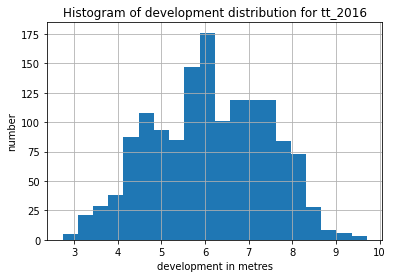

In [183]:
tt_2016_outliers_out_1['development'].hist(histtype = 'stepfilled', bins = 20)
plt.xlabel('development in metres')
plt.ylabel('number')
plt.title('Histogram of development distribution for tt_2016')

In [184]:
rr_2019_outliers_out['speed m/min'] = rr_2019_outliers_out['speed']*100/6

rr_2019_outliers_out['development'] = rr_2019_outliers_out['speed m/min'] / rr_2019_outliers_out['cadence']

rr_2019_outliers_out_1 = rr_2019_outliers_out.drop( rr_2019_outliers_out.index[((rr_2019_outliers_out['development'] > 10) | (rr_2019_outliers_out['development'] < 2))])

rr_2019_outliers_out_1

<ipython-input-184-0439e19b8261>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr_2019_outliers_out['speed m/min'] = rr_2019_outliers_out['speed']*100/6
<ipython-input-184-0439e19b8261>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr_2019_outliers_out['development'] = rr_2019_outliers_out['speed m/min'] / rr_2019_outliers_out['cadence']


,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance,speed m/min,development
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0,0.004679,280.711287,4.839850
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0,0.010615,356.184562,5.936409
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0,0.017214,395.965209,6.491233
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0,0.023944,403.759425,6.512249
2019-06-22 22:33:50+00:00,-33.416837,151.223008,214.6,6.0,183.0,63.0,71.0,0.006872,-0.2,24.737627,1.0,0.030815,412.293775,6.544346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 00:05:16+00:00,-33.415138,151.221910,217.6,7.0,271.0,94.0,153.0,0.010797,0.0,38.867755,1.0,51.675637,647.795914,6.891446
2019-06-23 00:05:17+00:00,-33.415224,151.221966,217.4,7.0,266.0,95.0,153.0,0.010884,-0.2,39.182439,1.0,51.686521,653.040653,6.874112
2019-06-23 00:05:18+00:00,-33.415310,151.222021,217.4,7.0,285.0,95.0,153.0,0.010840,0.0,39.023971,1.0,51.697361,650.399518,6.846311
2019-06-23 00:05:19+00:00,-33.415396,151.222075,217.2,7.0,280.0,95.0,153.0,0.010797,-0.2,38.867730,1.0,51.708157,647.795499,6.818900


In [185]:
rr_2019_outliers_out['development'].max()

inf

In [186]:
rr_2019_outliers_out['development'].min()

3.366011018064714

In [187]:
rr_2019_outliers_out_1['development'].max()

9.99394236509697

In [188]:
rr_2019_outliers_out_1['development'].min()

3.366011018064714

Text(0.5, 1.0, 'Histogram of development distribution for rr_2019')

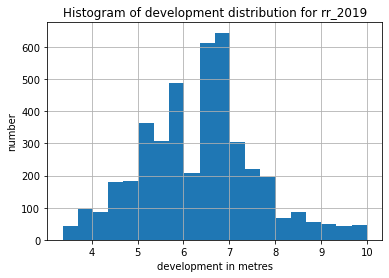

In [189]:
rr_2019_outliers_out_1['development'].hist(histtype = 'stepfilled', bins = 20)
plt.xlabel('development in metres')
plt.ylabel('number')
plt.title('Histogram of development distribution for rr_2019')

In [190]:
tt_2019_outliers_out['speed m/min'] = tt_2019_outliers_out['speed']*100/6

tt_2019_outliers_out['development'] = tt_2019_outliers_out['speed m/min'] / tt_2019_outliers_out['cadence']

tt_2019_outliers_out_1 = tt_2019_outliers_out.drop( tt_2019_outliers_out.index[((tt_2019_outliers_out['development'] > 10) | (tt_2019_outliers_out['development'] < 2))])

tt_2019_outliers_out_1

<ipython-input-190-4335bd935804>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt_2019_outliers_out['speed m/min'] = tt_2019_outliers_out['speed']*100/6
<ipython-input-190-4335bd935804>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt_2019_outliers_out['development'] = tt_2019_outliers_out['speed m/min'] / tt_2019_outliers_out['cadence']


,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,overall_distance,speed m/min,development
2019-06-01 22:55:07+00:00,-33.415575,151.221929,219.4,13.0,500.0,67.0,97.0,0.006098,0.0,21.954313,1.0,0.027631,365.905213,5.461272
2019-06-01 22:55:08+00:00,-33.415522,151.221900,219.4,13.0,493.0,74.0,99.0,0.006479,0.0,23.324036,1.0,0.034110,388.733933,5.253161
2019-06-01 22:55:09+00:00,-33.415464,151.221867,219.4,13.0,477.0,80.0,101.0,0.007140,0.0,25.702772,1.0,0.041249,428.379526,5.354744
2019-06-01 22:55:10+00:00,-33.415404,151.221833,219.6,13.0,431.0,86.0,103.0,0.007380,0.2,26.569339,1.0,0.048630,442.822314,5.149097
2019-06-01 22:55:11+00:00,-33.415341,151.221795,219.6,13.0,428.0,89.0,105.0,0.007843,0.0,28.234953,1.0,0.056473,470.582549,5.287444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 23:39:05+00:00,-33.415270,151.221994,220.8,10.0,335.0,101.0,166.0,0.012323,-0.2,44.363507,1.0,24.331623,739.391779,7.320711
2019-06-01 23:39:06+00:00,-33.415367,151.222056,220.8,10.0,350.0,101.0,166.0,0.012225,0.0,44.009916,1.0,24.343848,733.498594,7.262362
2019-06-01 23:39:07+00:00,-33.415462,151.222122,220.6,10.0,273.0,101.0,166.0,0.012211,-0.2,43.960218,1.0,24.356059,732.670295,7.254161
2019-06-01 23:39:08+00:00,-33.415555,151.222189,220.4,10.0,210.0,99.0,166.0,0.012067,-0.2,43.440736,1.0,24.368126,724.012261,7.313255


In [191]:
tt_2019_outliers_out['development'].max()

inf

In [192]:
tt_2019_outliers_out['development'].min()

2.683804453944883

In [193]:
tt_2019_outliers_out_1['development'].max()

9.87887658672589

In [194]:
tt_2019_outliers_out_1['development'].min()

2.683804453944883

Text(0.5, 1.0, 'Histogram of development distribution for tt_2019')

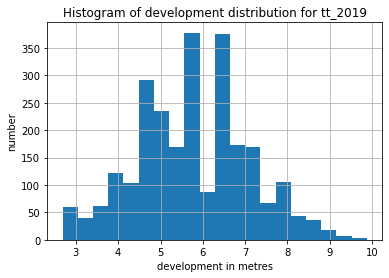

In [195]:
tt_2019_outliers_out_1['development'].hist(histtype = 'stepfilled', bins = 20)
plt.xlabel('development in metres')
plt.ylabel('number')
plt.title('Histogram of development distribution for tt_2019')

Text(0.5, 1.0, 'Histogram of development distribution for tt_2019')

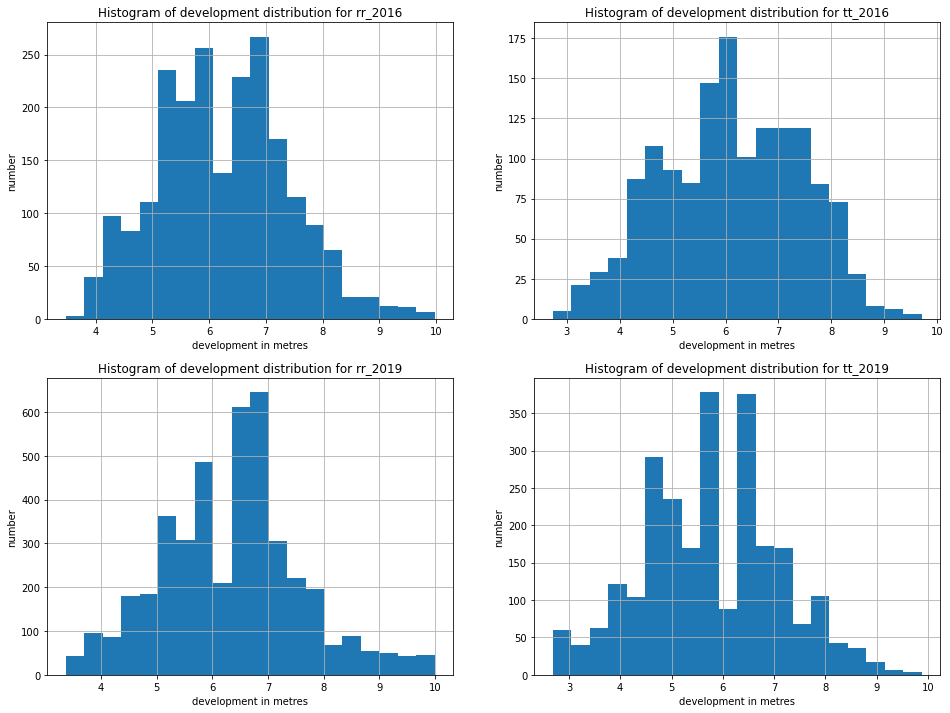

In [196]:
plt.figure(figsize=(16,12))
plt.subplot(2, 2, 1)
rr_2016_outliers_out_1['development'].hist(histtype = 'stepfilled', bins = 20)
plt.xlabel('development in metres')
plt.ylabel('number')
plt.title('Histogram of development distribution for rr_2016')
plt.subplot(2, 2, 2)
tt_2016_outliers_out_1['development'].hist(histtype = 'stepfilled', bins = 20)
plt.xlabel('development in metres')
plt.ylabel('number')
plt.title('Histogram of development distribution for tt_2016')
plt.subplot(2, 2, 3)
rr_2019_outliers_out_1['development'].hist(histtype = 'stepfilled', bins = 20)
plt.xlabel('development in metres')
plt.ylabel('number')
plt.title('Histogram of development distribution for rr_2019')
plt.subplot(2, 2, 4)
tt_2019_outliers_out_1['development'].hist(histtype = 'stepfilled', bins = 20)
plt.xlabel('development in metres')
plt.ylabel('number')
plt.title('Histogram of development distribution for tt_2019')

In [197]:
rr_2016_clean_development_average = rr_2016_outliers_out_1['development'].sum() / len(rr_2016_outliers_out_1['development'])

print('The average clean development for rr_2016 is ' + str(rr_2016_clean_development_average) + ' metres.')

The average clean development for rr_2016 is 6.247954096090702 metres.


In [198]:
rr_2016_clean_development_average

6.247954096090702

In [199]:
tt_2016_clean_development_average = tt_2016_outliers_out_1['development'].sum() / len(tt_2016_outliers_out_1['development'])

print('The average clean development for tt_2016 is ' + str(tt_2016_clean_development_average) + ' metres.')

The average clean development for tt_2016 is 6.111801123382386 metres.


In [200]:
rr_2019_clean_development_average = rr_2019_outliers_out_1['development'].sum() / len(rr_2019_outliers_out_1['development'])

print('The average clean development for rr_2019 is ' + str(rr_2019_clean_development_average) + ' metres.')

The average clean development for rr_2019 is 6.343245487161172 metres.


In [201]:
tt_2019_clean_development_average = tt_2019_outliers_out_1['development'].sum() / len(tt_2019_outliers_out_1['development'])

print('The average clean development for tt_2019 is ' + str(tt_2019_clean_development_average) + ' metres.')

The average clean development for tt_2019 is 5.778852767664144 metres.


The histograms are fairly normally distributed with an apparent average of about 6 metres, which is consistent with the actual data. Each of them has an obvious dip around the 6 metre mark. 